In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

C:\Users\maiso\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
data = pd.read_csv('Loan_with_missing_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
data.head()

ApplicationDate   Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01  45.0       39948.0        617.0         Employed   
1      2018-01-02  38.0       39709.0        628.0         Employed   
2      2018-01-03  47.0       40724.0          NaN         Employed   
3      2018-01-04  58.0       69084.0        545.0         Employed   
4      2018-01-05  37.0      103264.0        594.0         Employed   

  EducationLevel  Experience  LoanAmount  LoanDuration MaritalStatus  \
0         Master        22.0     13152.0           NaN       Married   
1      Associate        15.0         NaN          48.0        Single   
2       Bachelor        26.0     17627.0           NaN       Married   
3    High School        34.0     37898.0          96.0        Single   
4      Associate        17.0      9184.0          36.0       Married   

   NumberOfDependents HomeOwnershipStatus  MonthlyDebtPayments  \
0                 2.0                 Own                183.0   
1                 1.0            Mortgage                496.0   
2                 NaN                Rent                902.0   
3                 1.0            Mortgage                755.0   
4                 1.0            Mortgage                274.0   

   CreditCardUtilizationRate  NumberOfOpenCreditLines  \
0                   0.354418                      1.0   
1                        NaN                      5.0   
2                   0.137414                      NaN   
3                        NaN                      2.0   
4                   0.320535                      0.0   

   NumberOfCreditInquiries  DebtToIncomeRatio  BankruptcyHistory  \
0                      2.0           0.358336                NaN   
1                      3.0           0.330274                0.0   
2                      0.0           0.244729                0.0   
3                      1.0           0.436244                0.0   
4                      0.0                NaN                0.0   

          LoanPurpose  PreviousLoanDefaults  PaymentHistory  \
0                Home                   0.0            29.0   
1  Debt Consolidation                   0.0            21.0   
2                 NaN                   0.0            20.0   
3                Home                   0.0             NaN   
4  Debt Consolidation                   0.0            26.0   

   LengthOfCreditHistory  SavingsAccountBalance  CheckingAccountBalance  \
0                    9.0                    NaN                     NaN   
1                    9.0                 4627.0                  3460.0   
2                   22.0                  886.0                   895.0   
3                   10.0                 1675.0                  1217.0   
4                    NaN                 1555.0                  4981.0   

   TotalAssets  TotalLiabilities  MonthlyIncome  UtilityBillsPaymentHistory  \
0     146111.0           19183.0    3329.000000                    0.724972   
1      53204.0            9595.0    3309.083333                    0.935132   
2      25176.0          128874.0    3393.666667                         NaN   
3     104822.0               NaN            NaN                    0.896155   
4     244305.0           17286.0    8605.333333                    0.941369   

   JobTenure  NetWorth  BaseInterestRate  InterestRate  MonthlyLoanPayment  \
0       11.0  126928.0          0.199652      0.227590          419.805992   
1        3.0       NaN          0.207045      0.201077          794.054238   
2        6.0    5205.0          0.217627      0.212548          666.406688   
3        5.0   99452.0          0.300398      0.300911         1047.506980   
4        5.0  227019.0          0.197184      0.175990          330.179140   

   TotalDebtToIncomeRatio  LoanApproved  RiskScore  
0                0.181077           0.0       49.0  
1                0.389852           0.0       52.0  
2                0.462157           0.0       52.0  
3      

In [4]:
data.describe()

Age   AnnualIncome   CreditScore    Experience     LoanAmount  \
count  17761.000000   17819.000000  17854.000000  17861.000000   17742.000000   
mean      39.703846   59391.548908    571.585639     17.544370   24825.315861   
std       11.616222   40681.541332     50.902912     11.304832   13277.063016   
min       18.000000   15000.000000    343.000000      0.000000    3674.000000   
25%       31.000000   31694.500000    540.000000      9.000000   15553.500000   
50%       40.000000   48703.000000    578.000000     17.000000   21916.500000   
75%       48.000000   74686.500000    609.000000     25.000000   30790.000000   
max       80.000000  485341.000000    712.000000     61.000000  148776.000000   

       LoanDuration  NumberOfDependents  MonthlyDebtPayments  \
count  17747.000000         17759.00000         17877.000000   
mean      54.087564             1.51557           453.677966   
std       24.689926             1.38552           240.868863   
min       12.000000             0.00000            50.000000   
25%       36.000000             0.00000           286.000000   
50%       48.000000             1.00000           401.000000   
75%       72.000000             2.00000           562.000000   
max      120.000000             5.00000          2919.000000   

       CreditCardUtilizationRate  NumberOfOpenCreditLines  \
count               17806.000000             17857.000000   
mean                    0.286060                 3.029400   
std                     0.159687                 1.731462   
min                     0.000974                 0.000000   
25%                     0.160421                 2.000000   
50%                     0.265993                 3.000000   
75%                     0.390272                 4.000000   
max                     0.917380                13.000000   

       NumberOfCreditInquiries  DebtToIncomeRatio  BankruptcyHistory  \
count             17874.000000       17817.000000       17843.000000   
mean                  0.992895           0.285944           0.051169   
std                   0.987815           0.160242           0.220348   
min                   0.000000           0.001720           0.000000   
25%                   0.000000           0.161433           0.000000   
50%                   1.000000           0.264544           0.000000   
75%                   2.000000           0.390325           0.000000   
max                   7.000000           0.902253           1.000000   

       PreviousLoanDefaults  PaymentHistory  LengthOfCreditHistory  \
count          17806.000000    17831.000000           17880.000000   
mean               0.099742       23.986877              14.972036   
std                0.299664        4.954889               8.379626   
min                0.000000        8.000000               1.000000   
25%                0.000000       21.000000               8.000000   
50%                0.000000       24.000000              15.000000   
75%                0.000000       27.000000              22.000000   
max                1.000000       45.000000              29.000000   

       SavingsAccountBalance  CheckingAccountBalance   TotalAssets  \
count           17781.000000            17793.000000  1.778200e+04   
mean             4943.913953             1778.953971  9.660055e+04   
std              6593.897803             2216.761885  1.200386e+05   
min                73.000000               24.000000  2.098000e+03   
25%              1544.000000              550.000000  3.116925e+04   
50%              2990.000000             1114.000000  6.070000e+04   
75%              5892.000000             2119.000000  1.174632e+05   
max            200089.000000            38024.000000  2.619627e+06   

       TotalLiabilities  MonthlyIncome  UtilityBillsPaymentHistory  \
count      1.783800e+04   17841.000000                17868.000000   
mean       3.633056e+04    4881.070582                    0.800175   
std        4.750902e+04    3289.198316

In [5]:
missed_values = data.isnull().sum()
print(missed_values)

ApplicationDate               2207
Age                           2239
AnnualIncome                  2181
CreditScore                   2146
EmploymentStatus              2198
EducationLevel                2149
Experience                    2139
LoanAmount                    2258
LoanDuration                  2253
MaritalStatus                 2137
NumberOfDependents            2241
HomeOwnershipStatus           2227
MonthlyDebtPayments           2123
CreditCardUtilizationRate     2194
NumberOfOpenCreditLines       2143
NumberOfCreditInquiries       2126
DebtToIncomeRatio             2183
BankruptcyHistory             2157
LoanPurpose                   2220
PreviousLoanDefaults          2194
PaymentHistory                2169
LengthOfCreditHistory         2120
SavingsAccountBalance         2219
CheckingAccountBalance        2207
TotalAssets                   2218
TotalLiabilities              2162
MonthlyIncome                 2159
UtilityBillsPaymentHistory    2132
JobTenure           

In [10]:
numerical_columns = ['Age', 'AnnualIncome', 'CreditScore', 'Experience', 'LoanAmount', 'LoanDuration', 'NumberOfDependents', 
                     'MonthlyDebtPayments', 'CreditCardUtilizationRate','LengthOfCreditHistory', 'SavingsAccountBalance', 
                     'CheckingAccountBalance', 'JobTenure', 'NetWorth', 'NumberOfOpenCreditLines', 'NumberOfCreditInquiries', 
                     'DebtToIncomeRatio', 'TotalAssets', 'TotalLiabilities', 'MonthlyIncome', 'BaseInterestRate', 'InterestRate', 
                     'MonthlyLoanPayment', 'TotalDebtToIncomeRatio', 'RiskScore', 'PaymentHistory', 'BankruptcyHistory', 
                     'UtilityBillsPaymentHistory', 'PreviousLoanDefaults', 'LoanApproved']

categorical_columns = ['EmploymentStatus', 'EducationLevel', 'MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose']


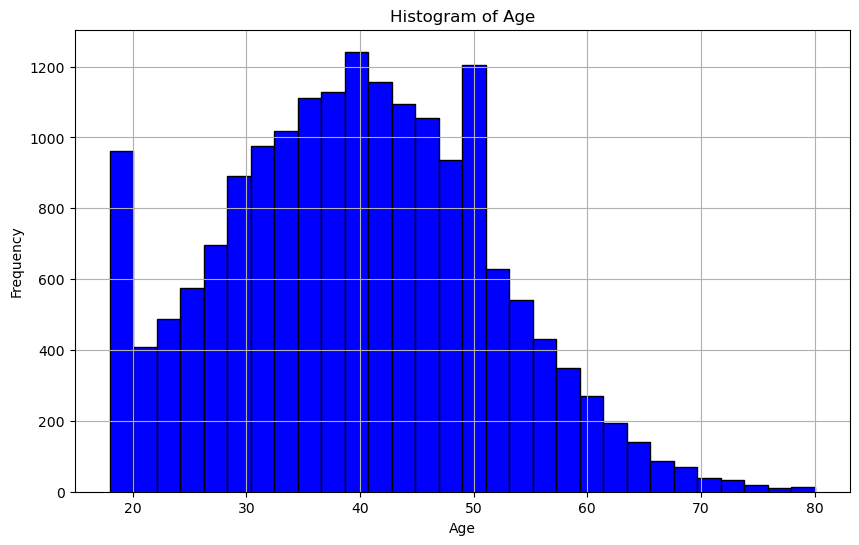

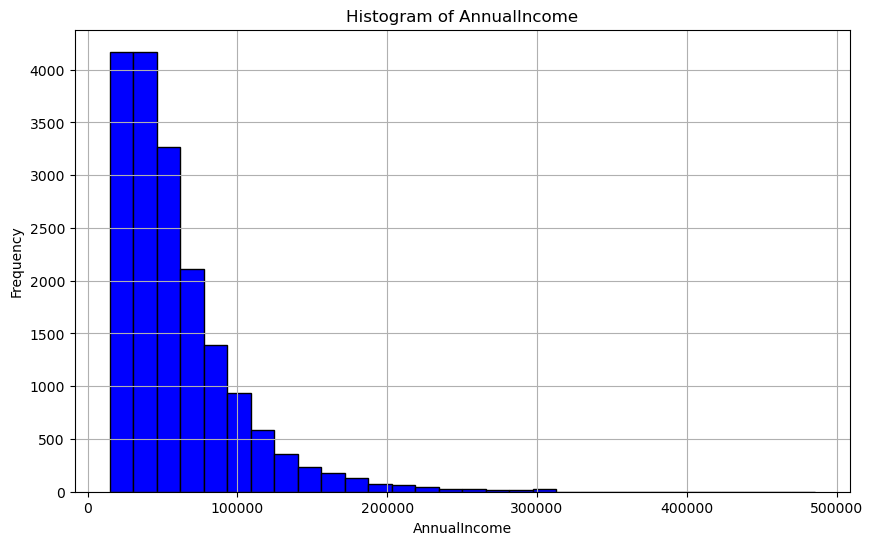

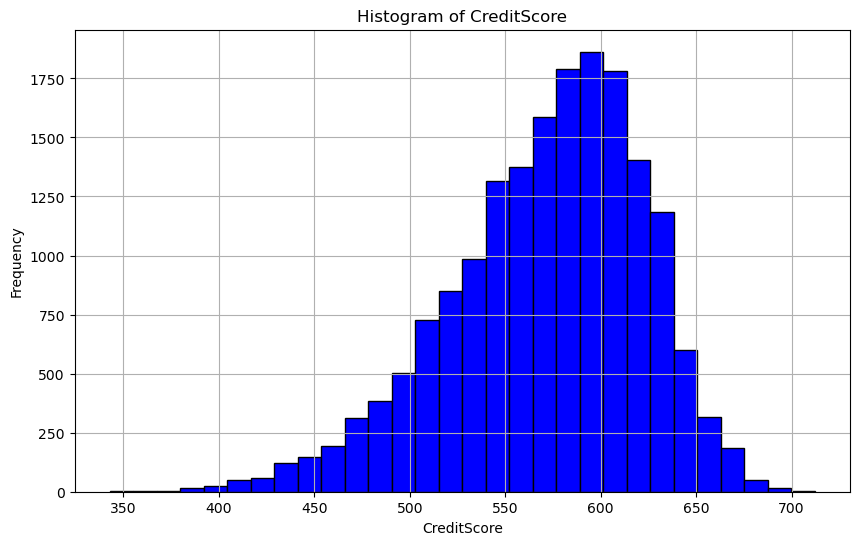

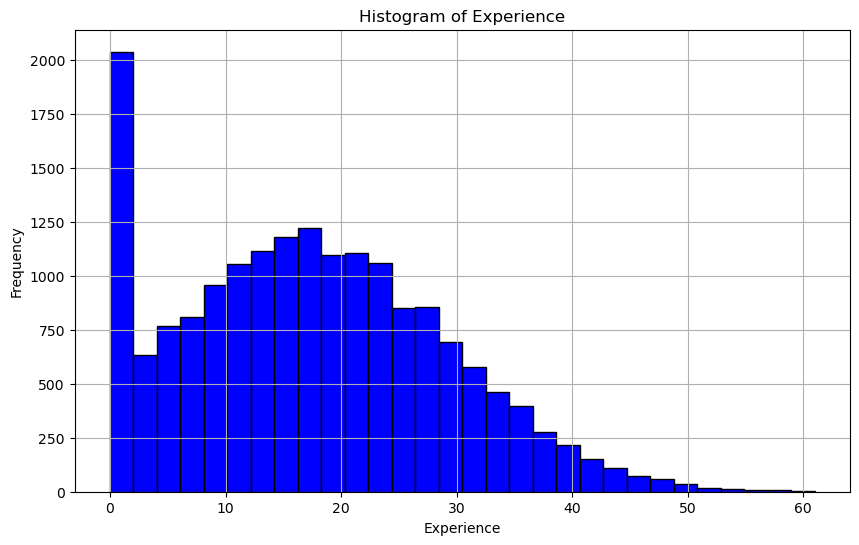

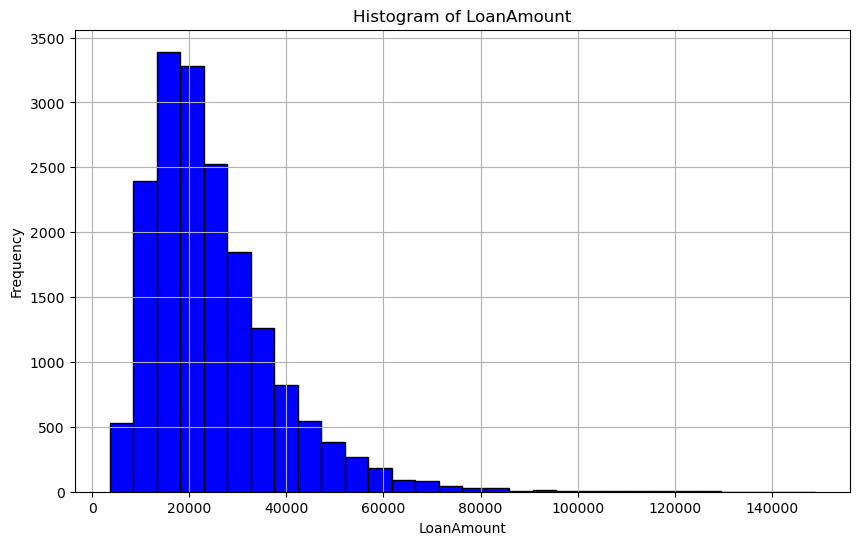

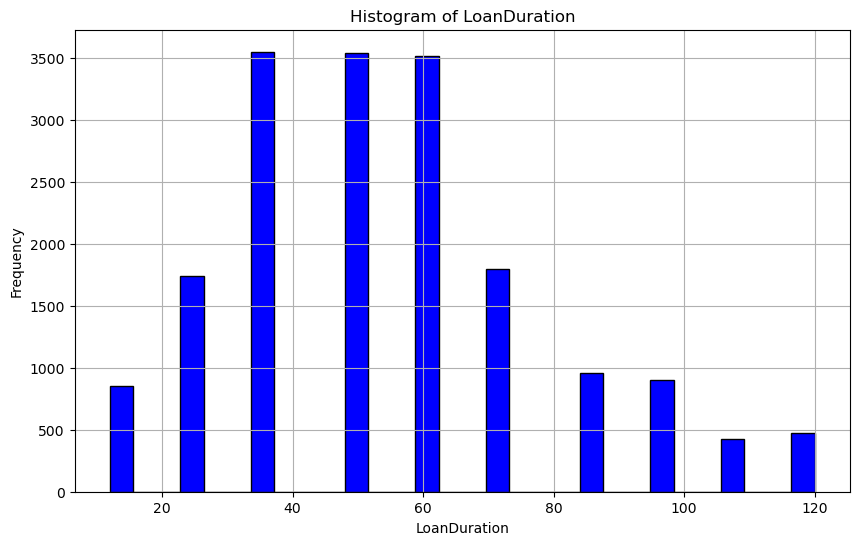

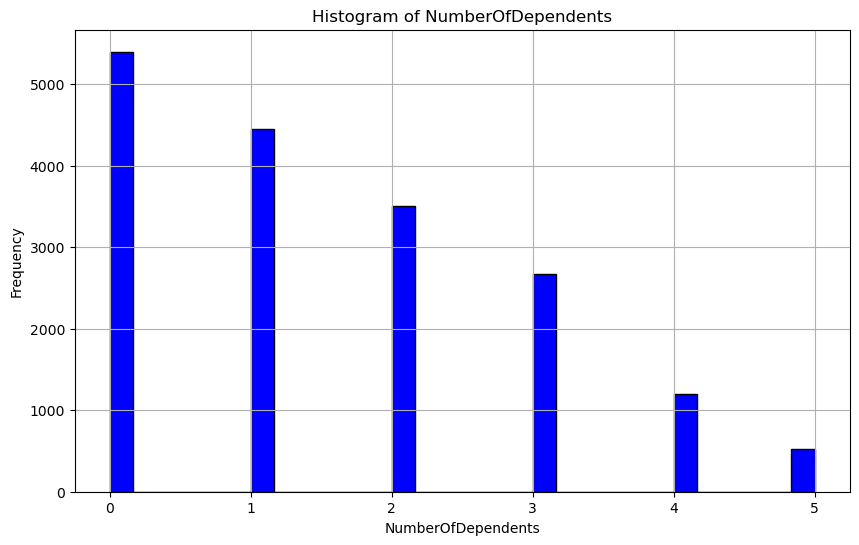

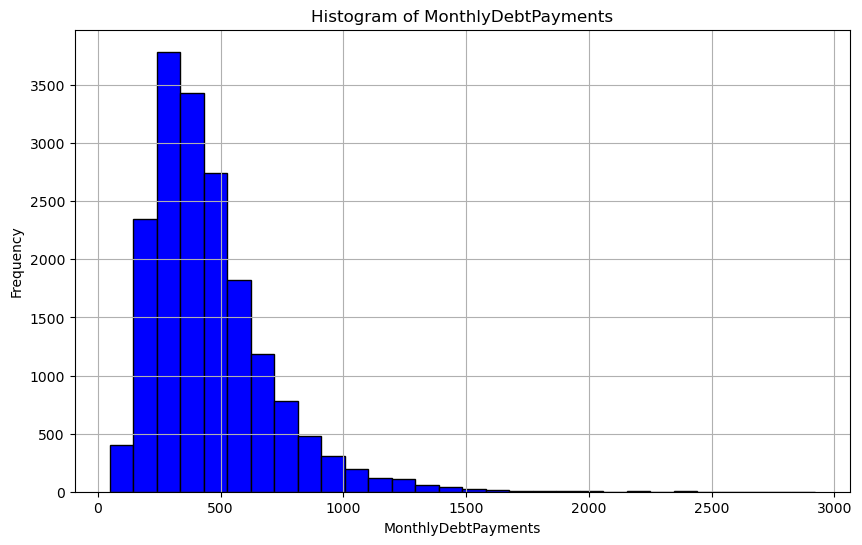

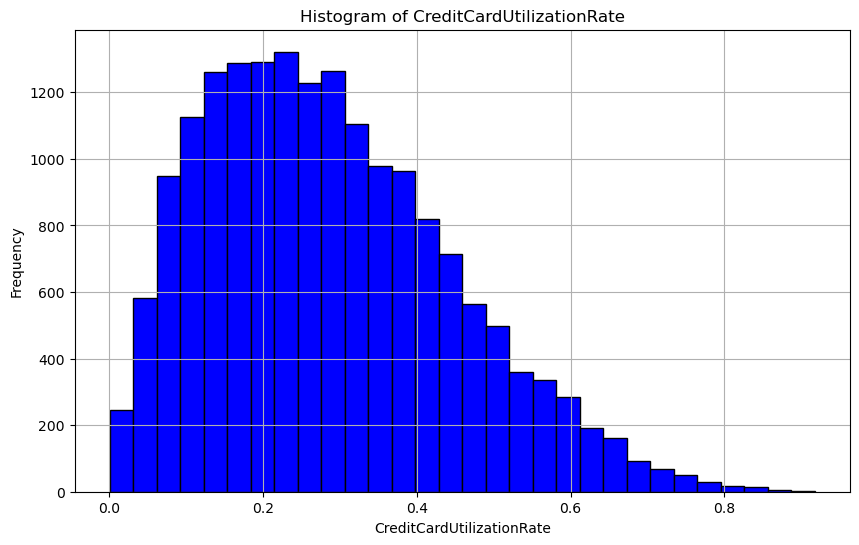

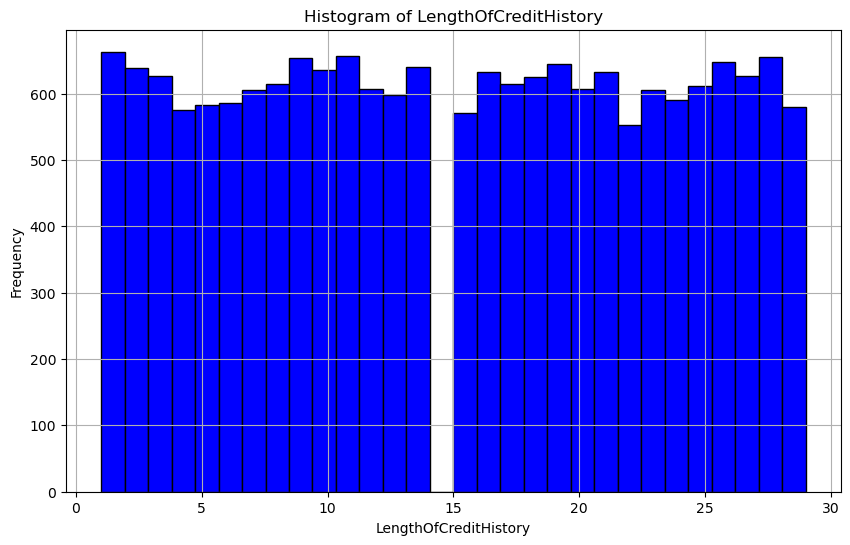

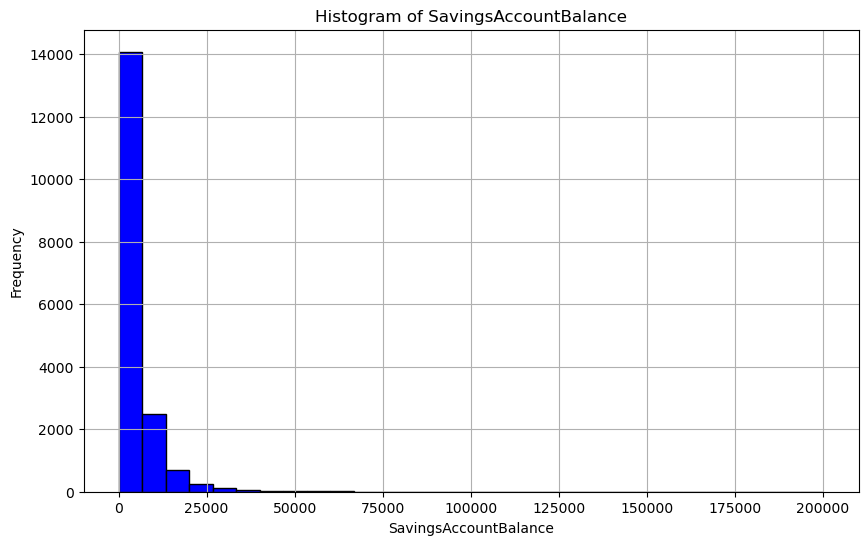

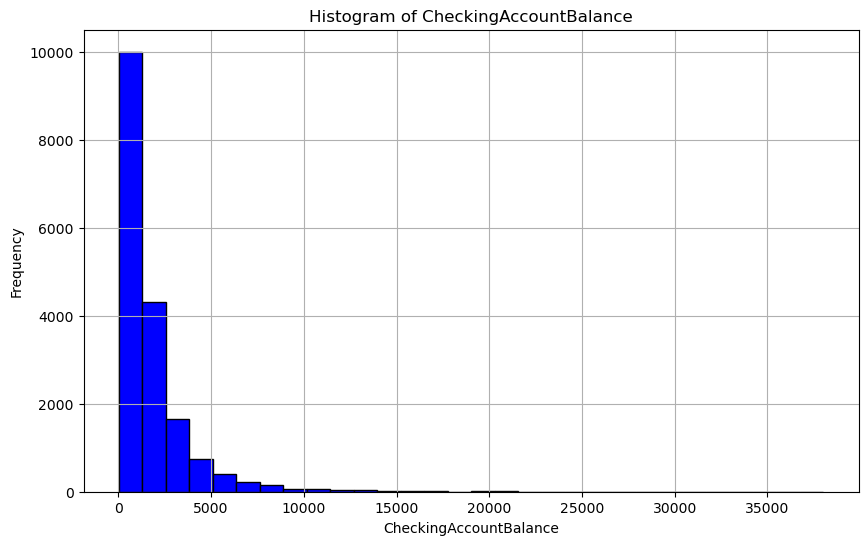

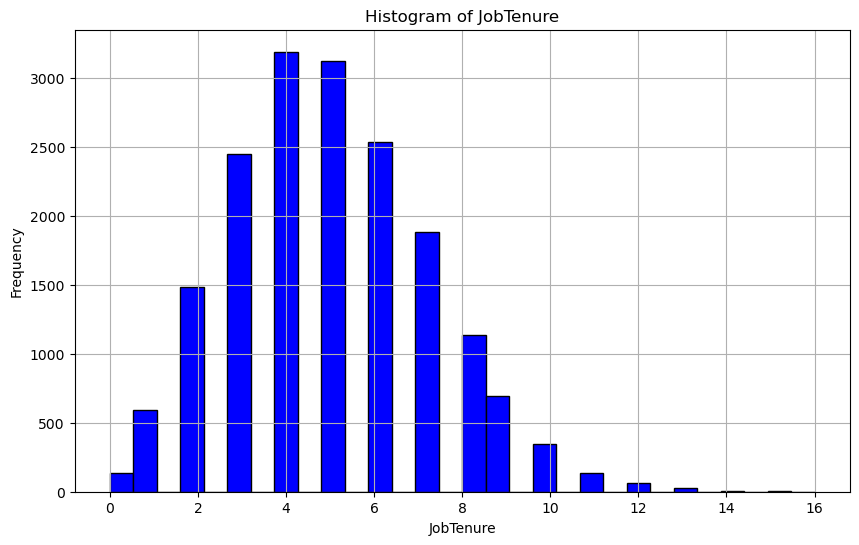

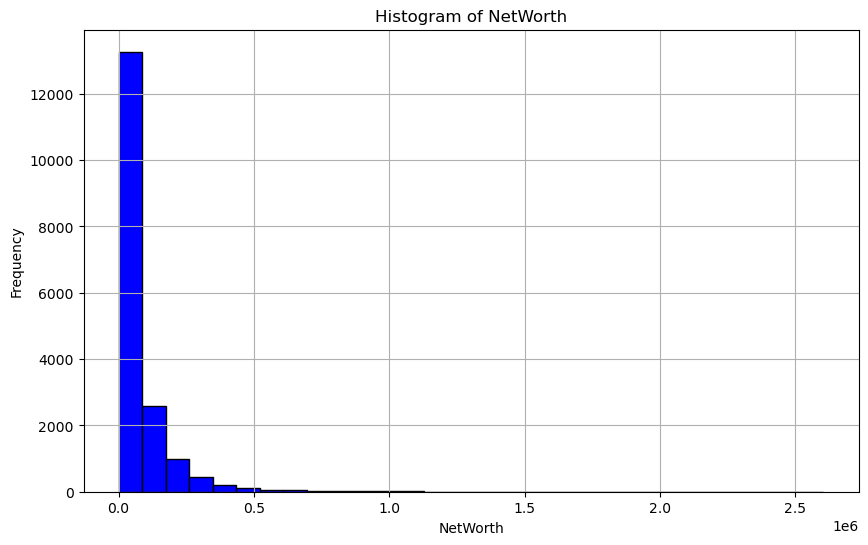

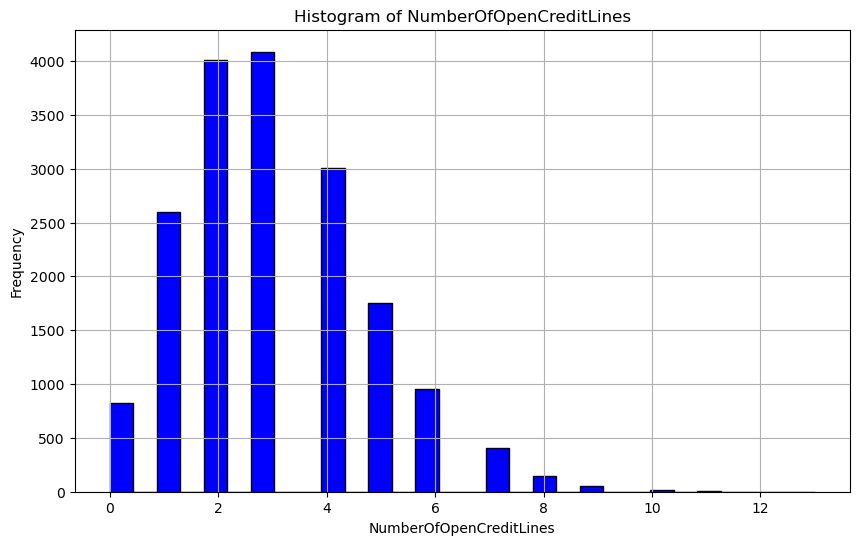

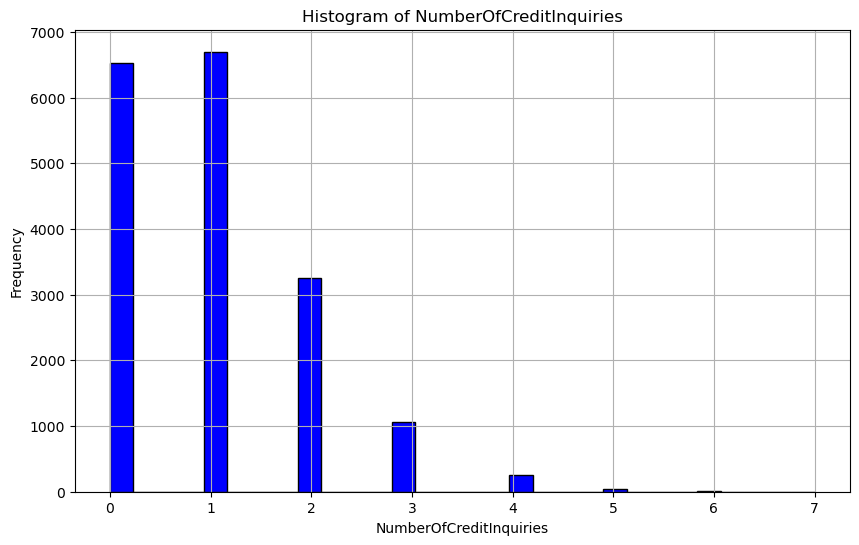

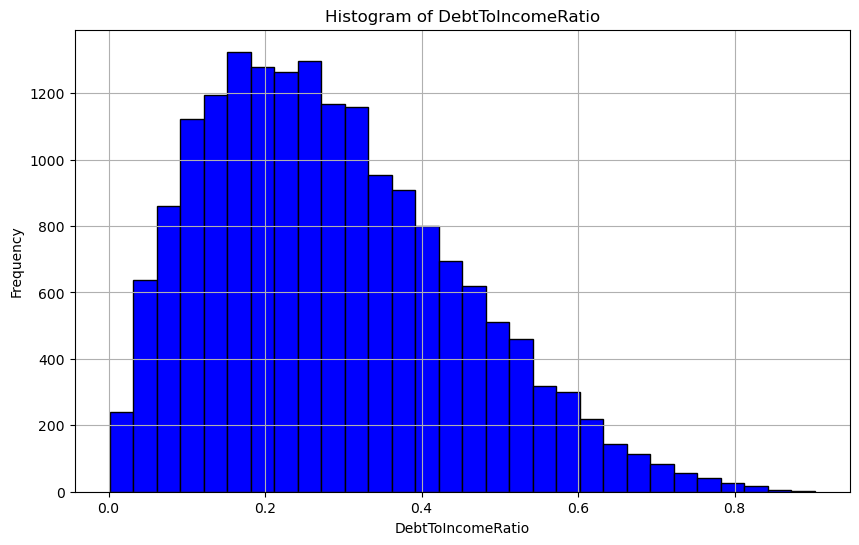

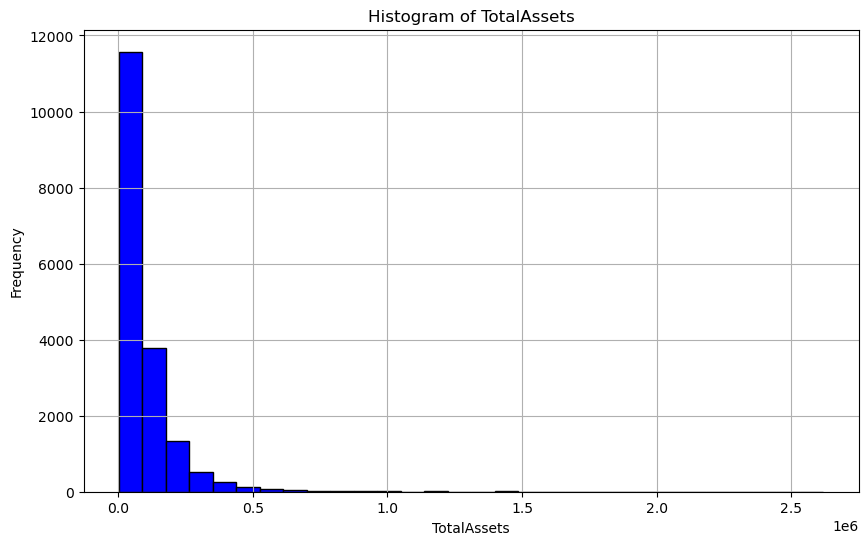

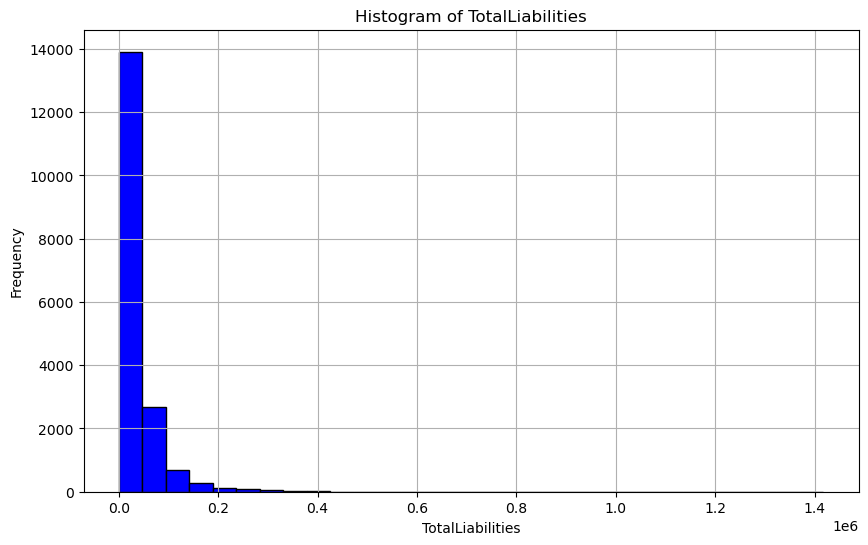

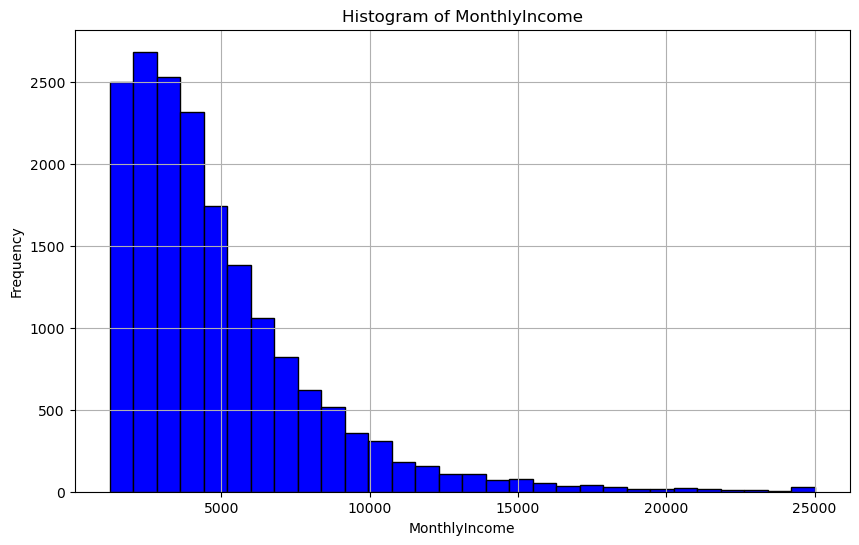

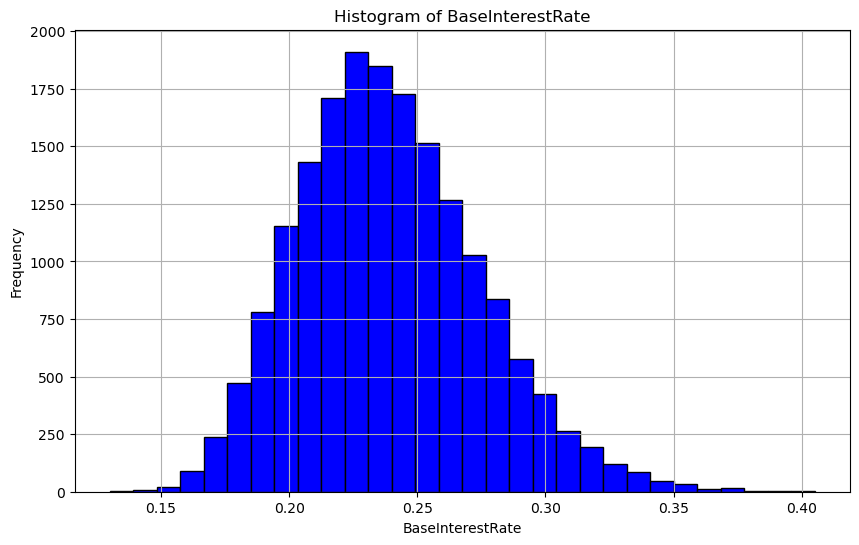

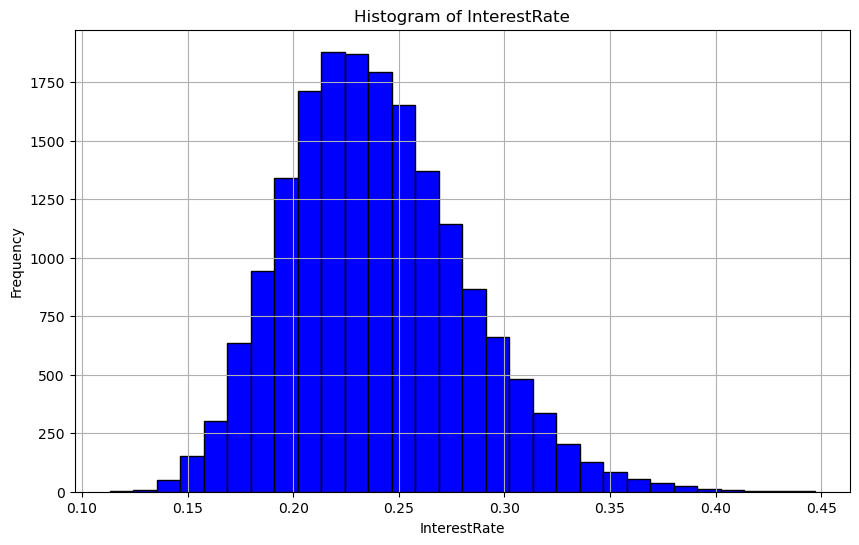

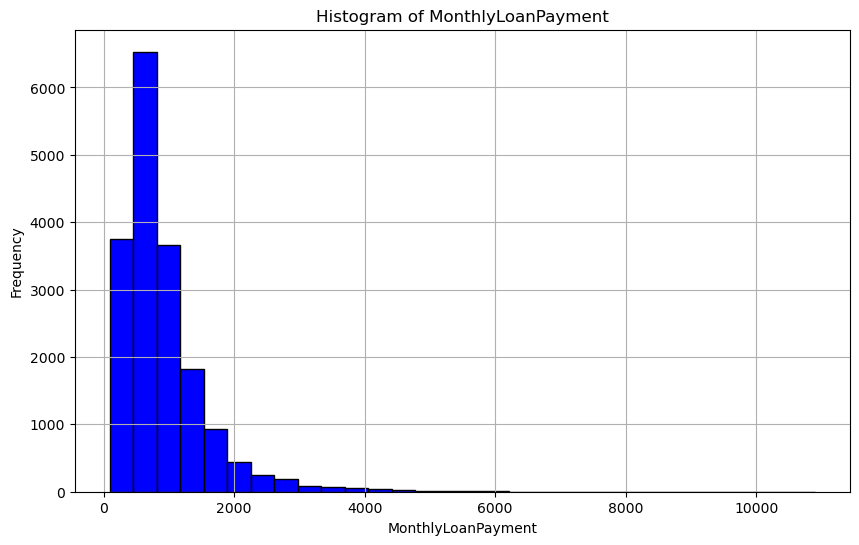

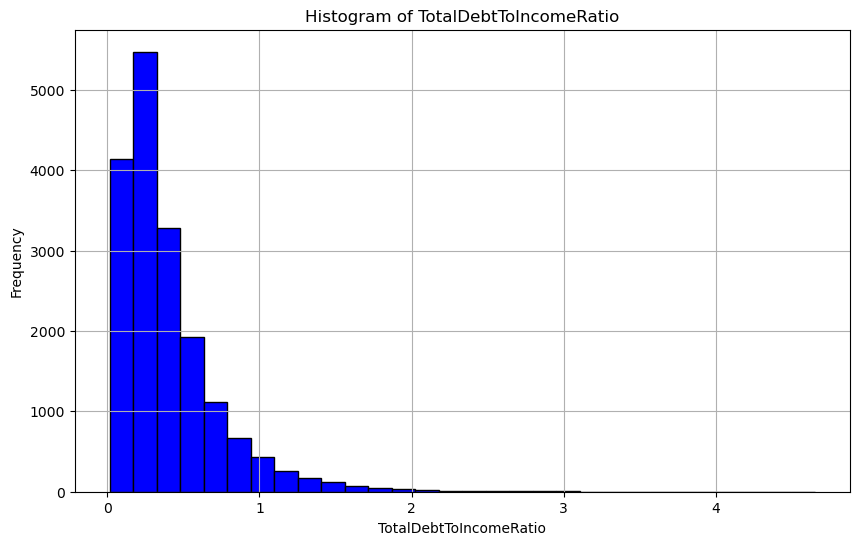

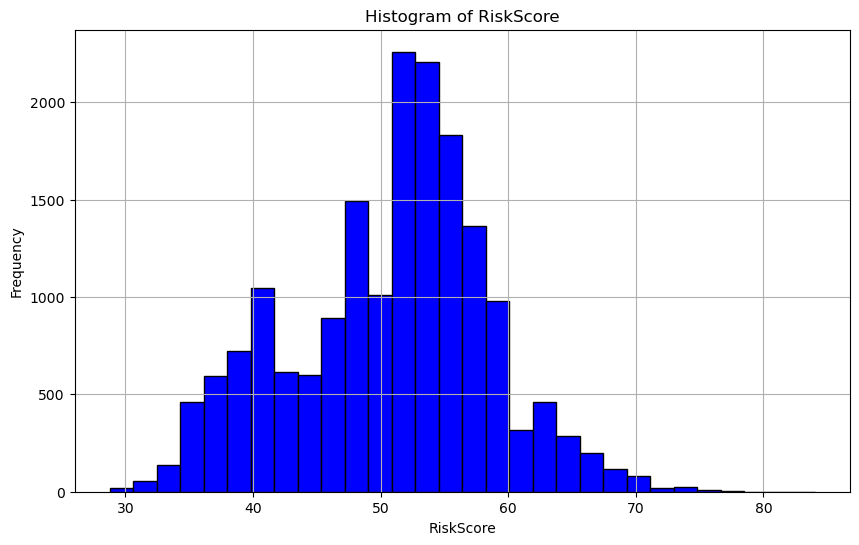

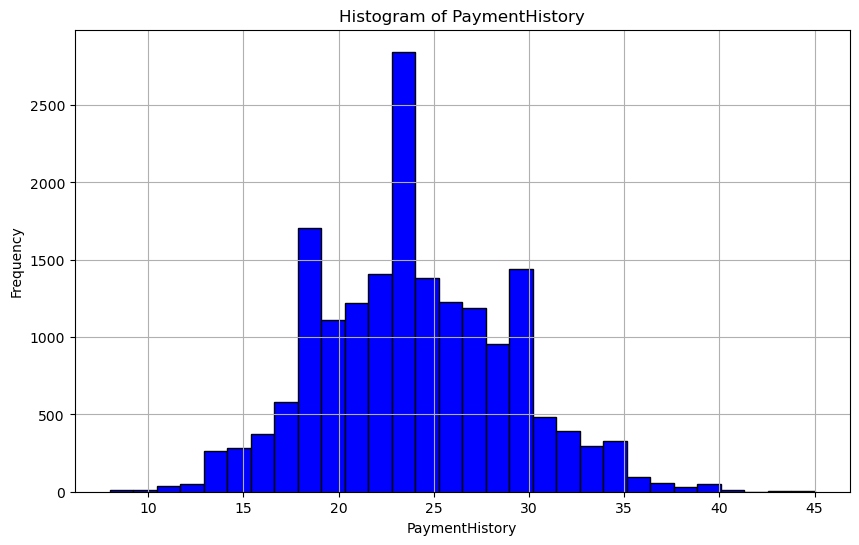

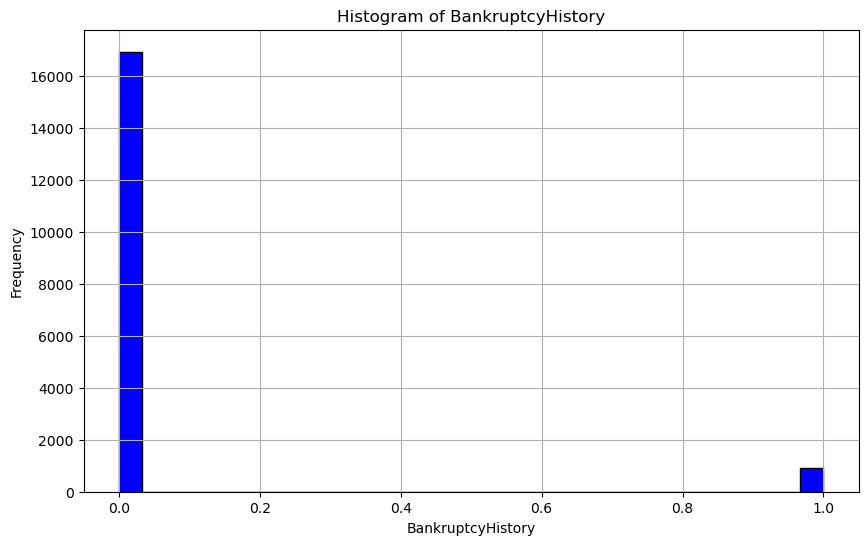

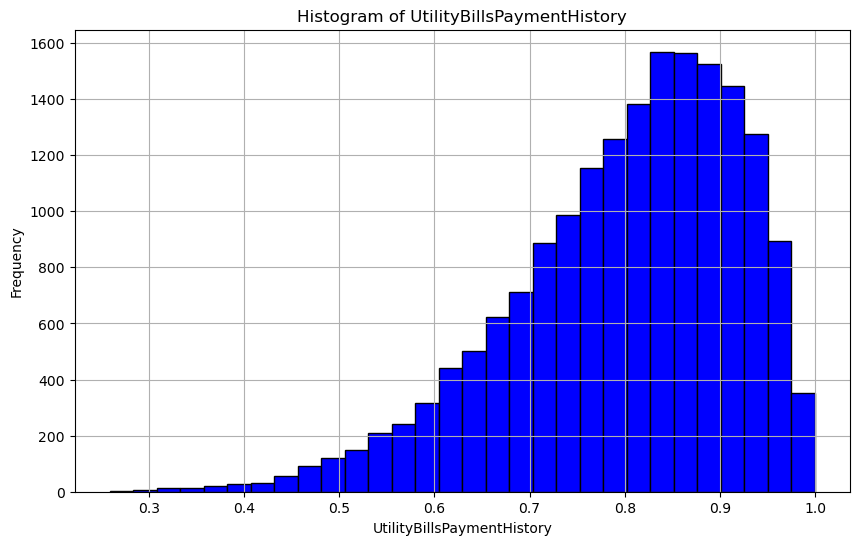

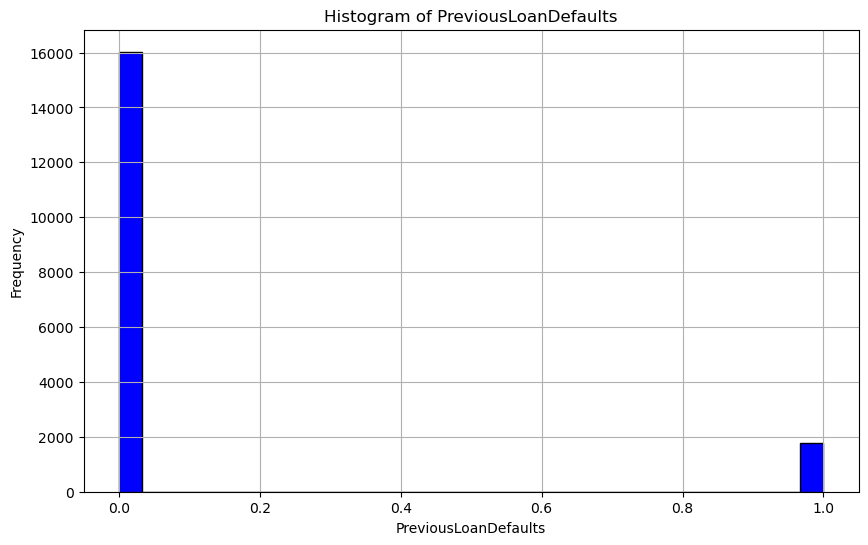

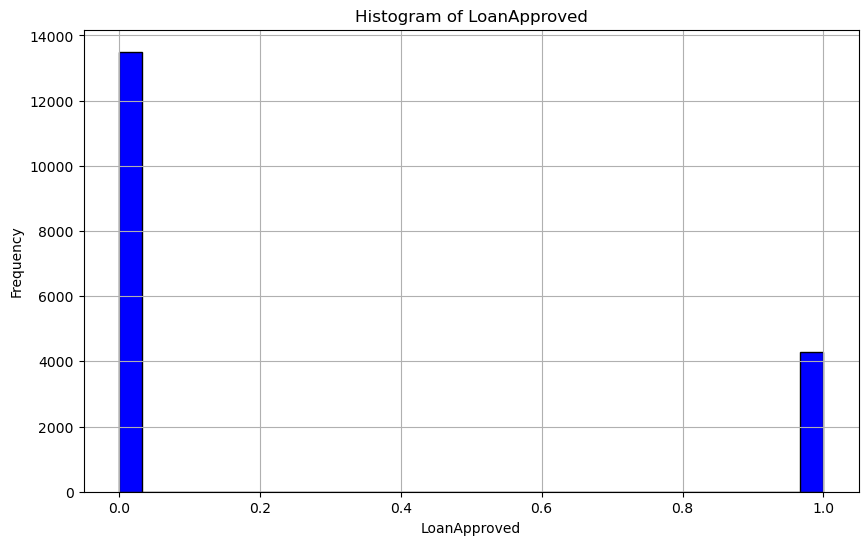

In [101]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.hist(data[column].dropna(), bins=30, color='blue', edgecolor='black')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

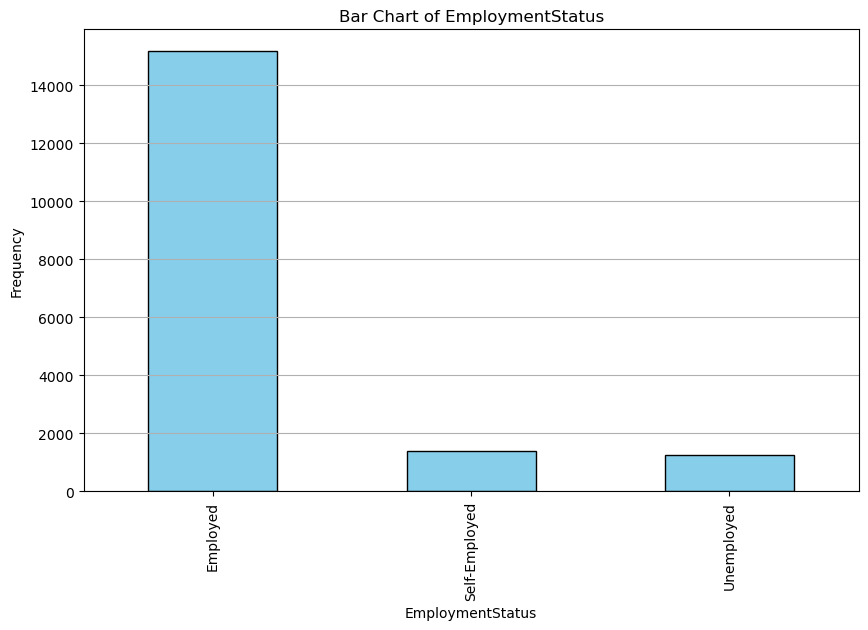

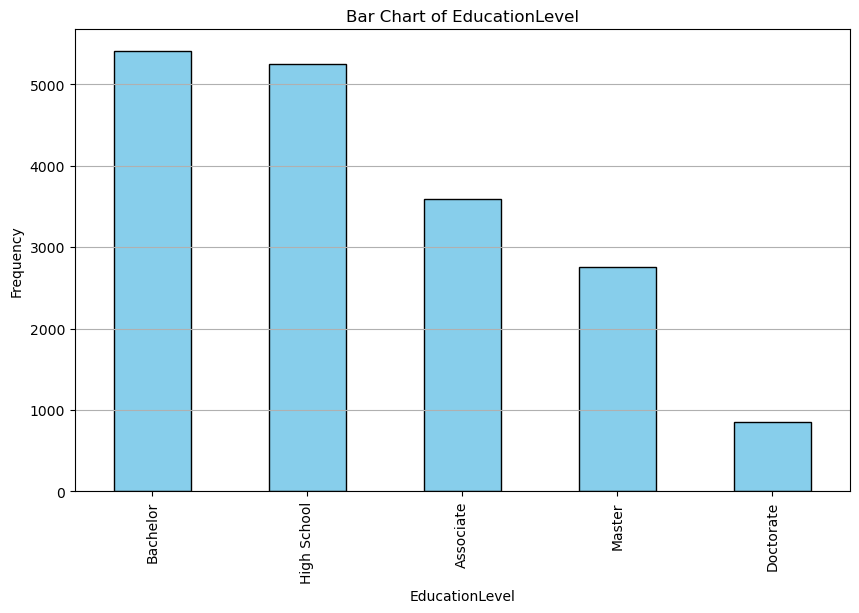

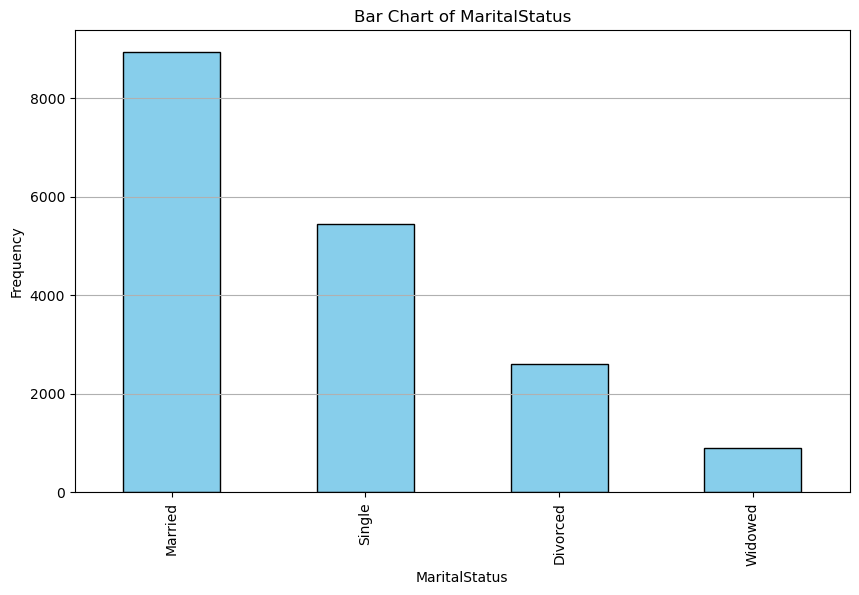

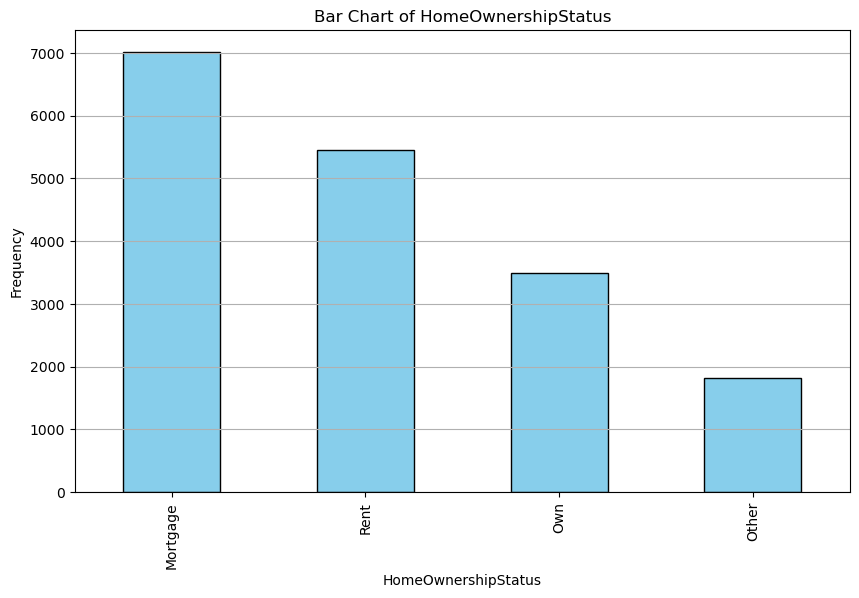

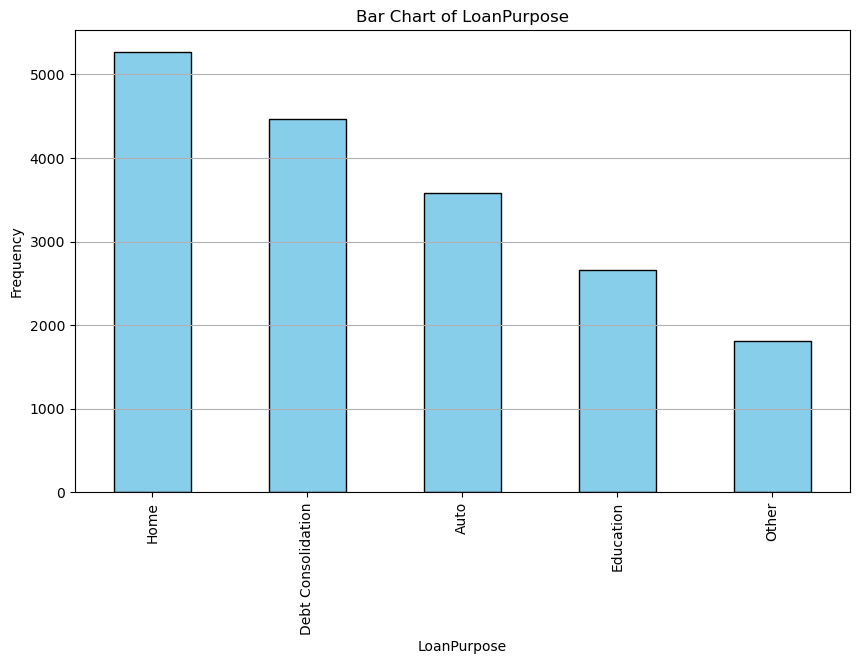

In [104]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    data[column].dropna().value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f'Bar Chart of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.show()

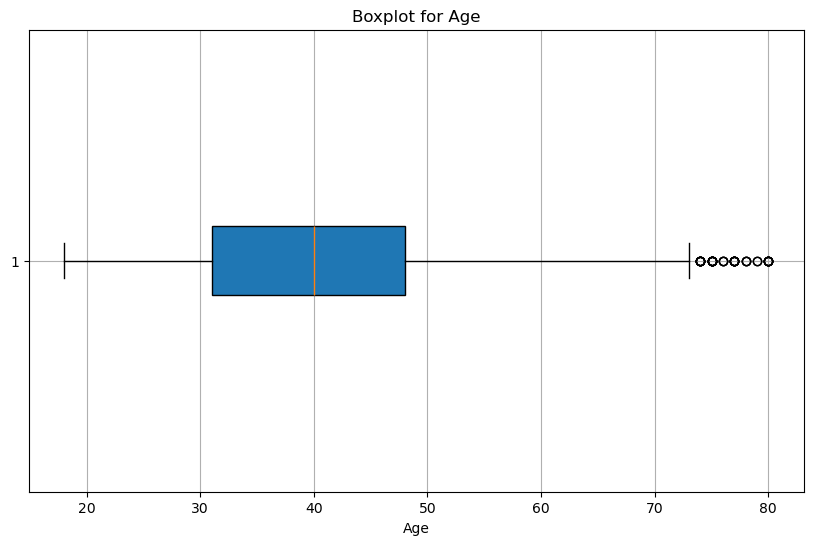

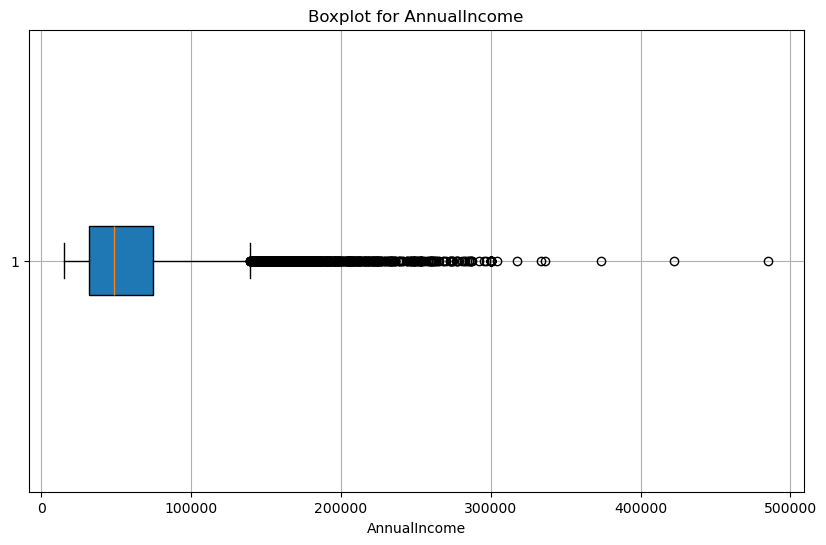

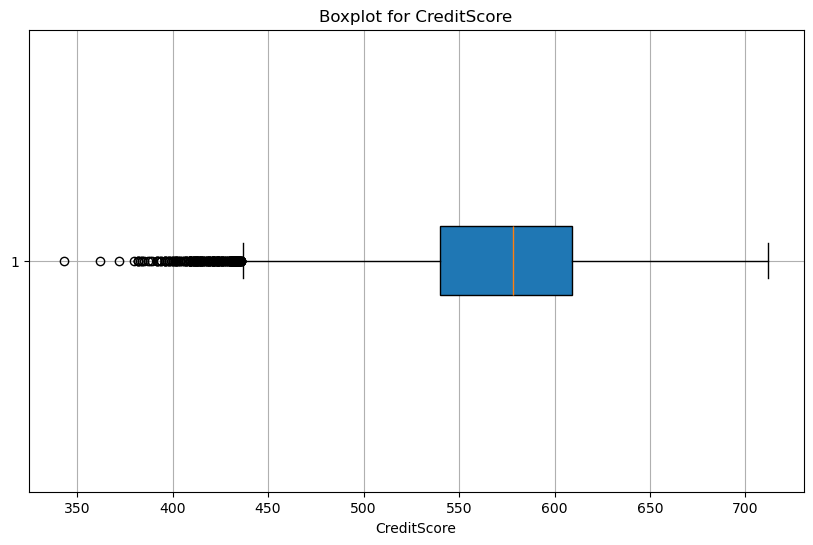

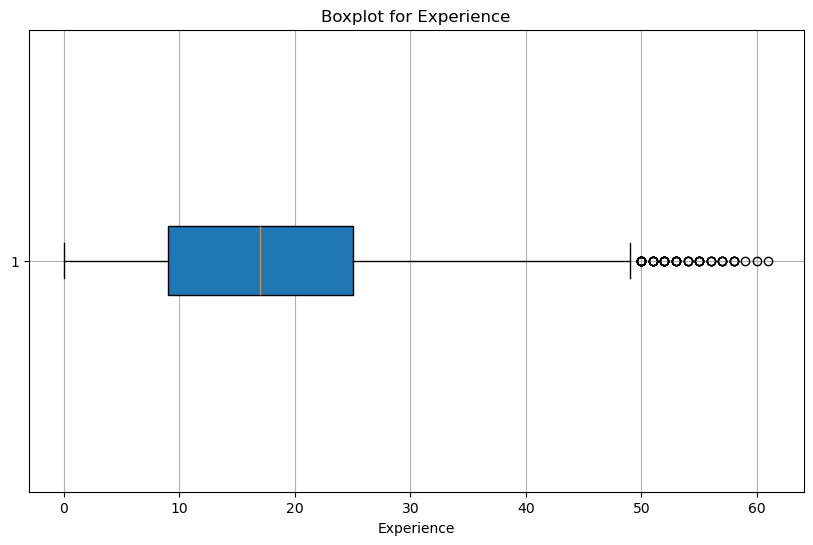

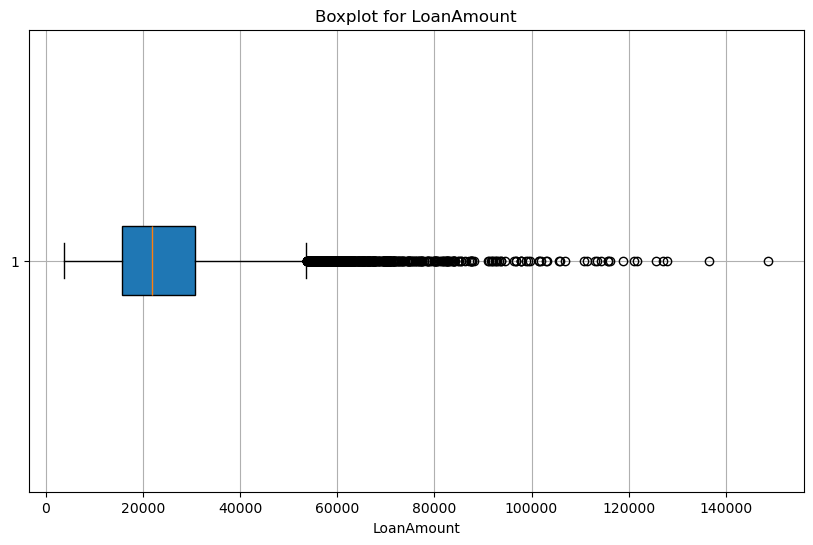

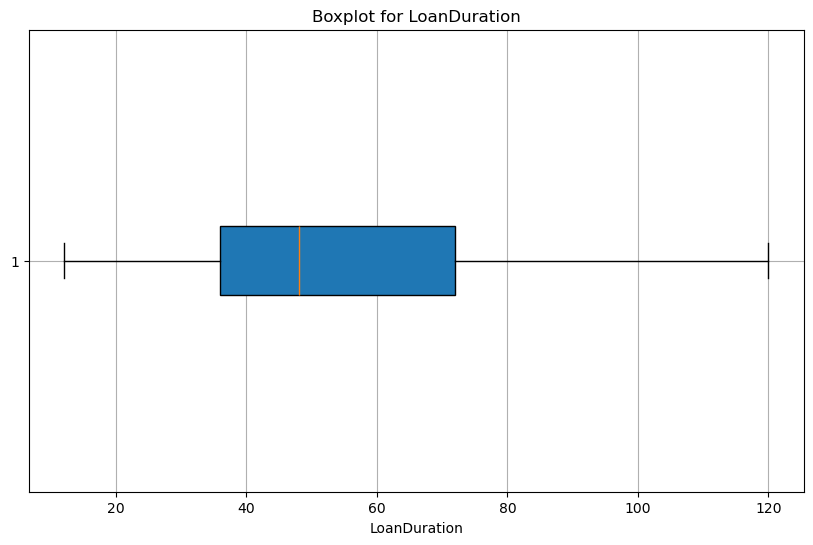

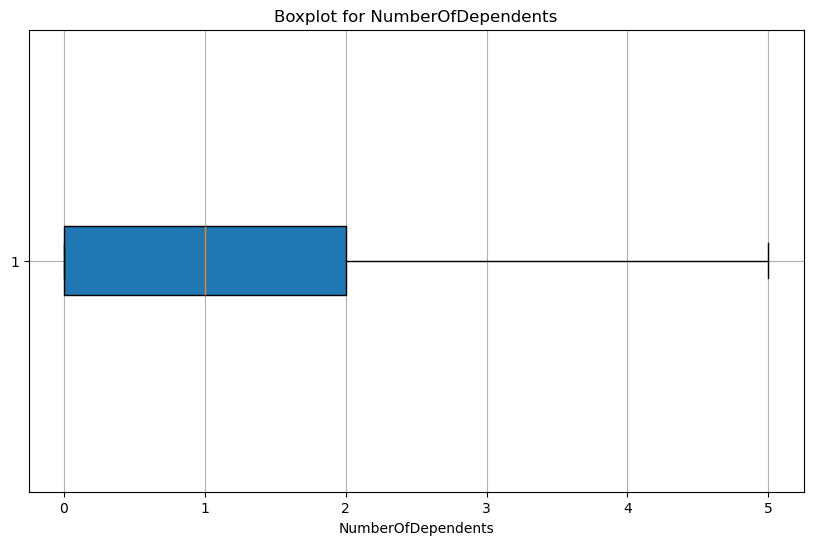

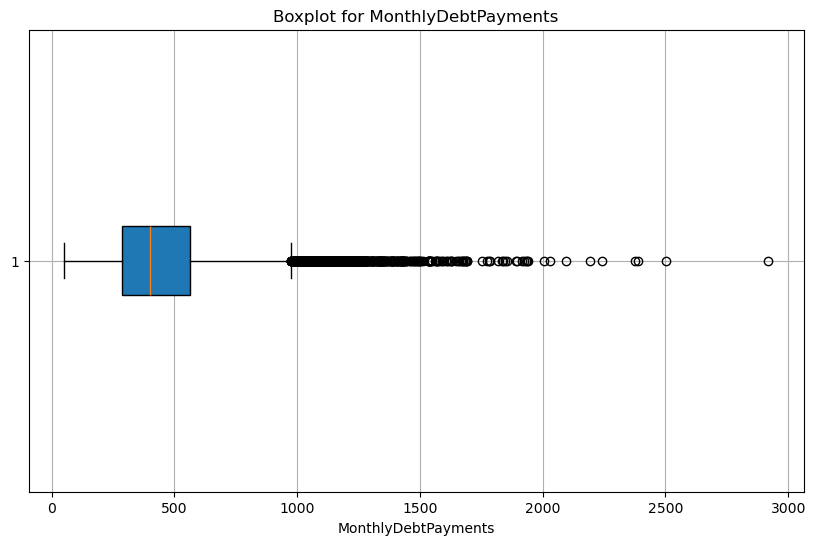

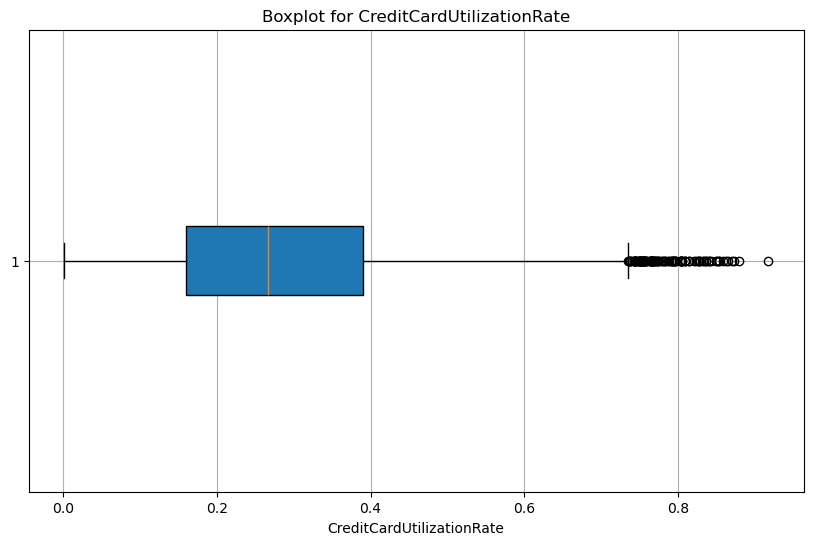

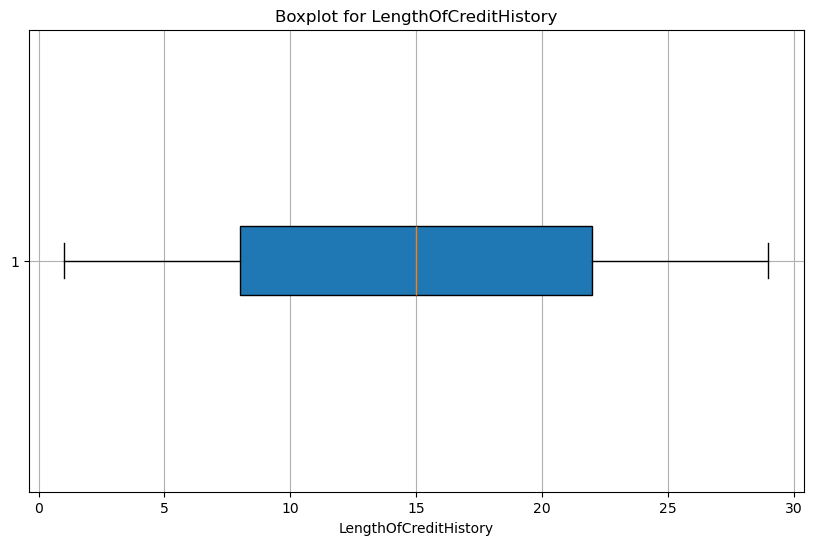

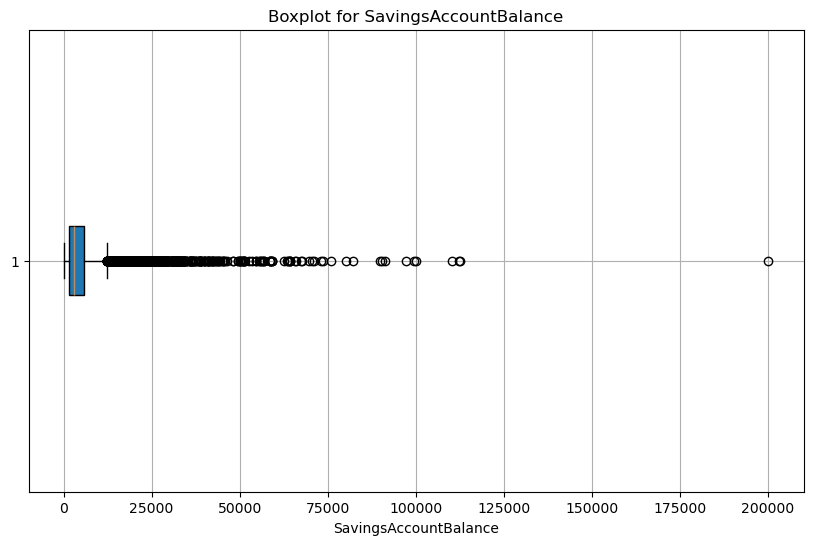

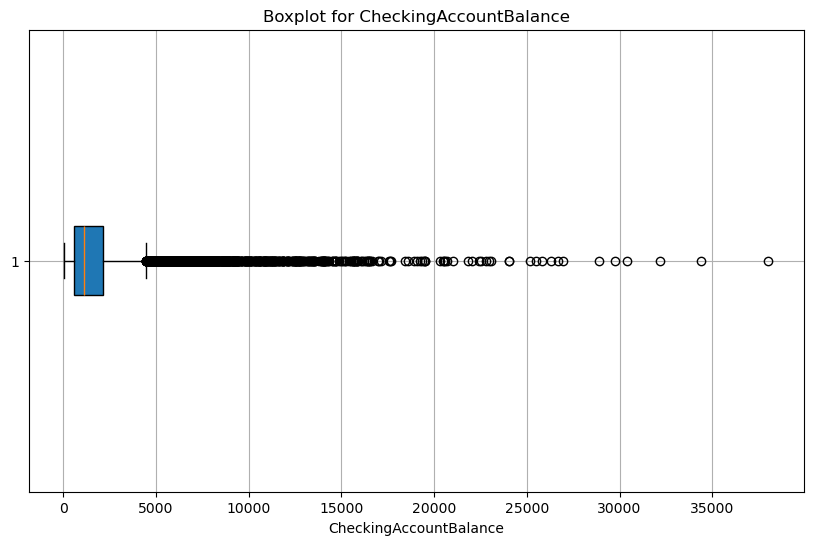

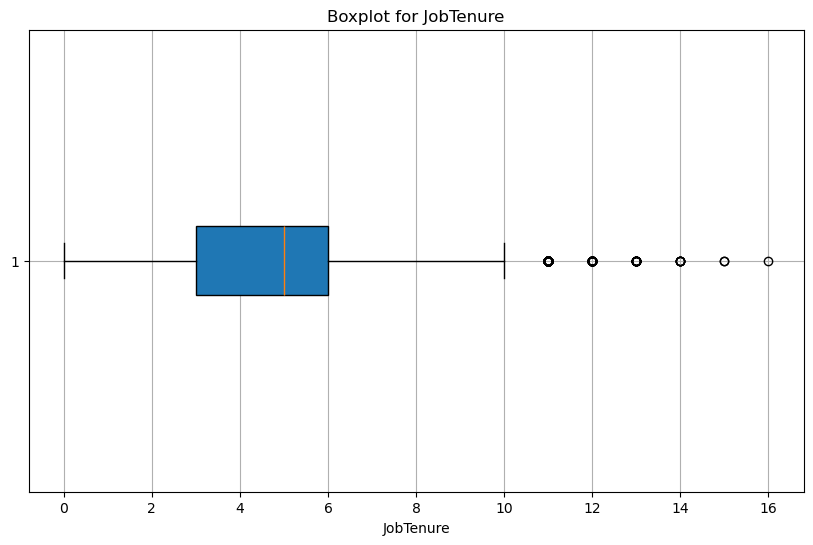

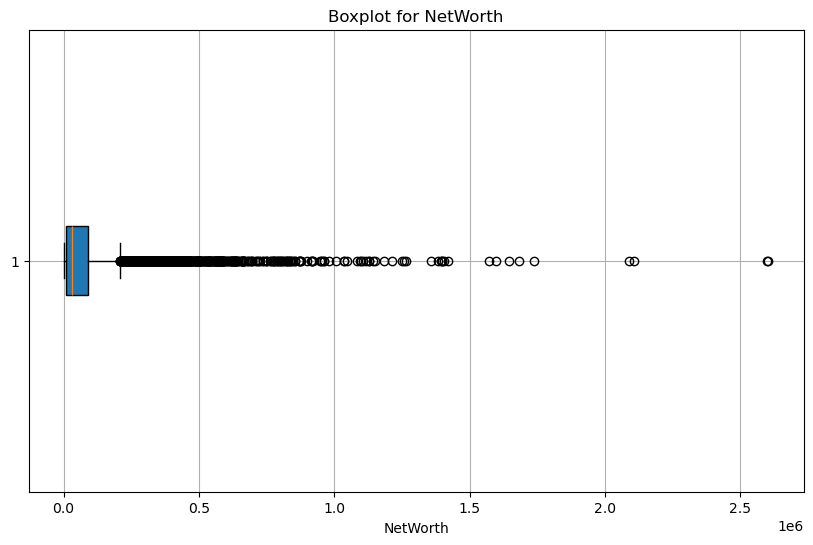

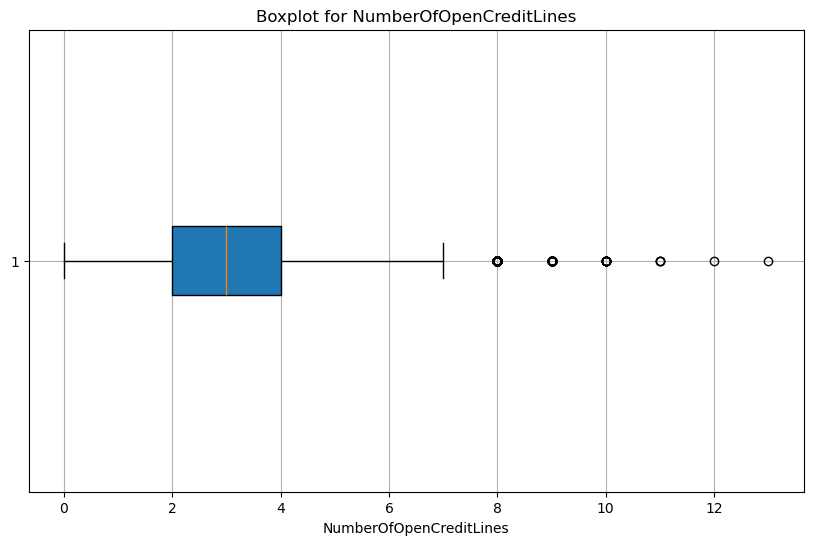

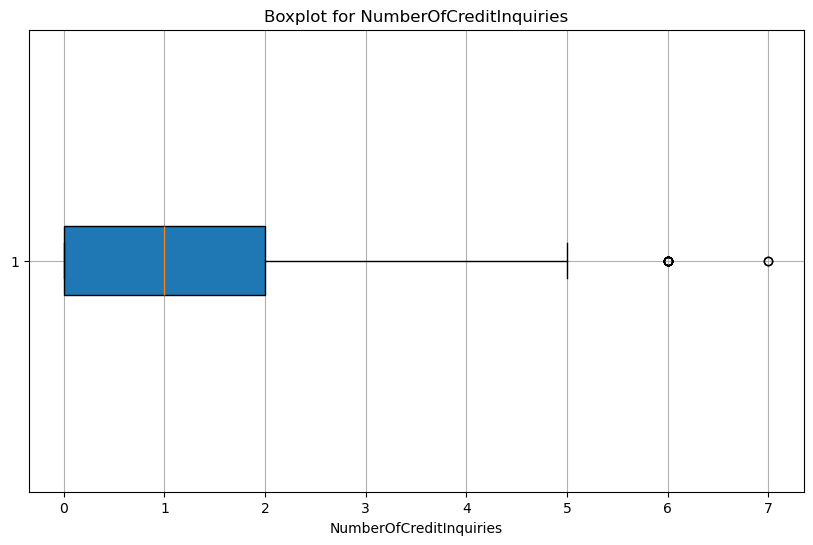

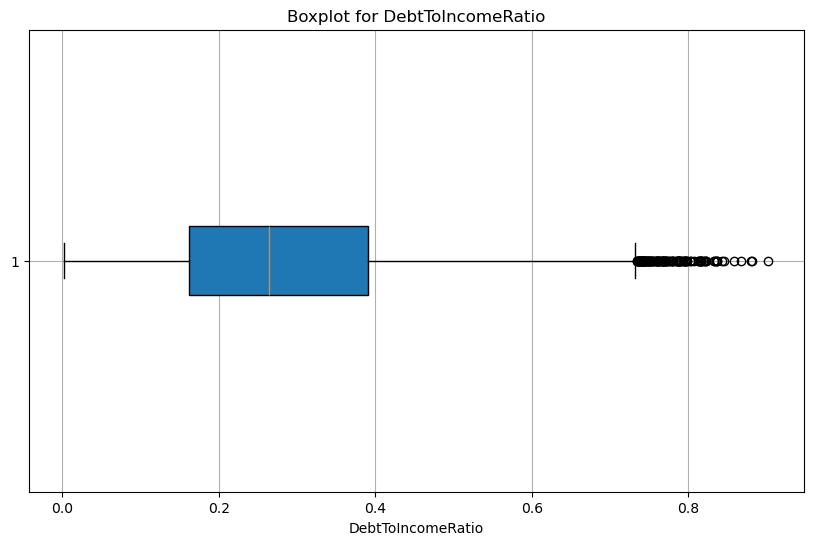

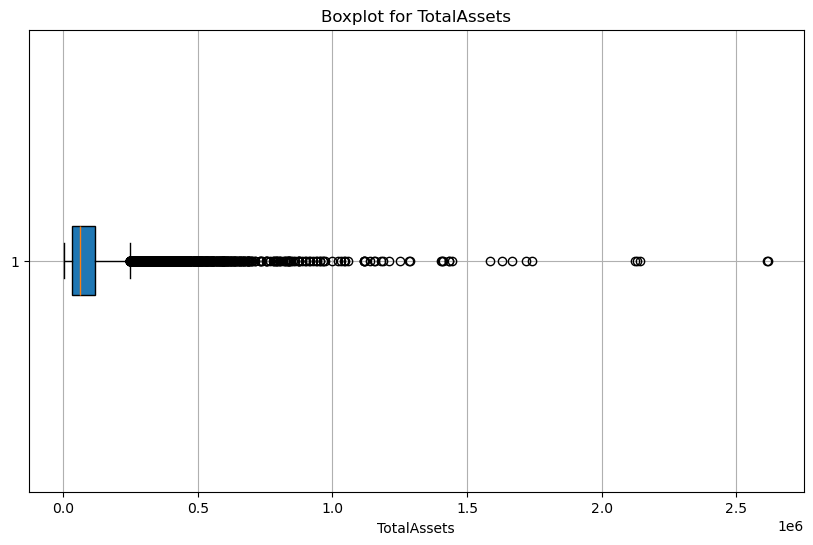

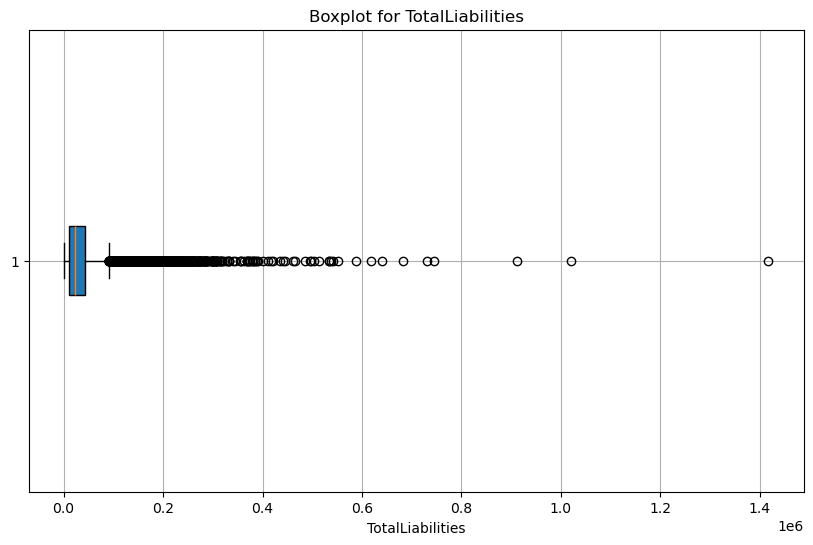

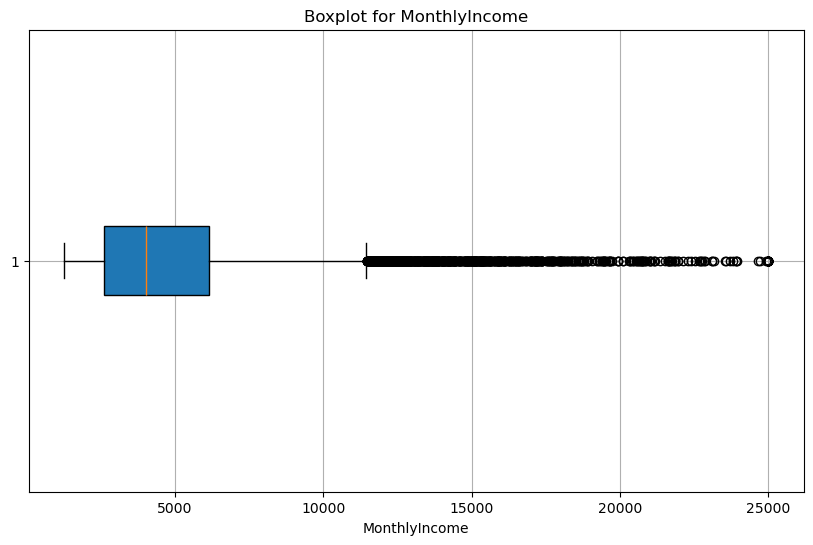

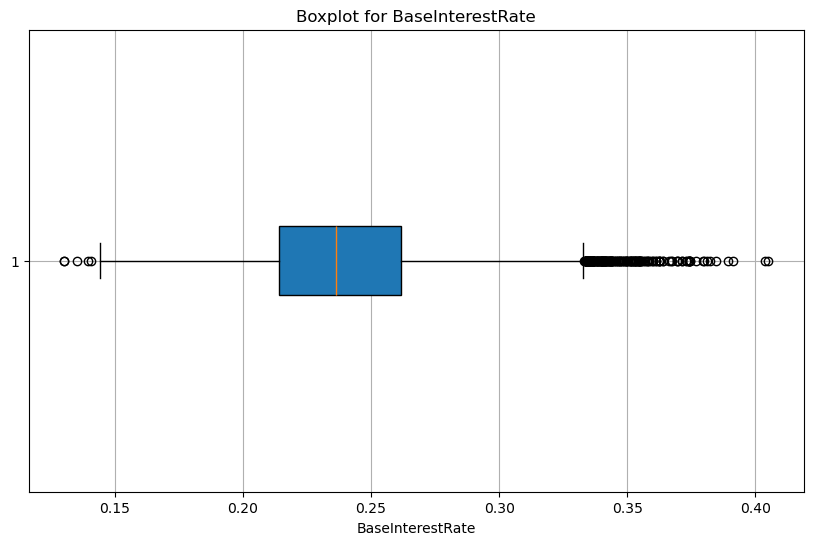

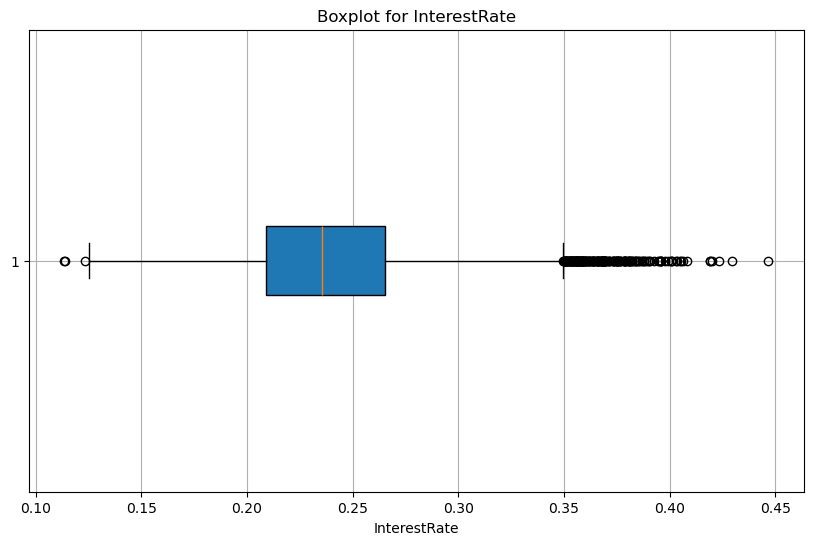

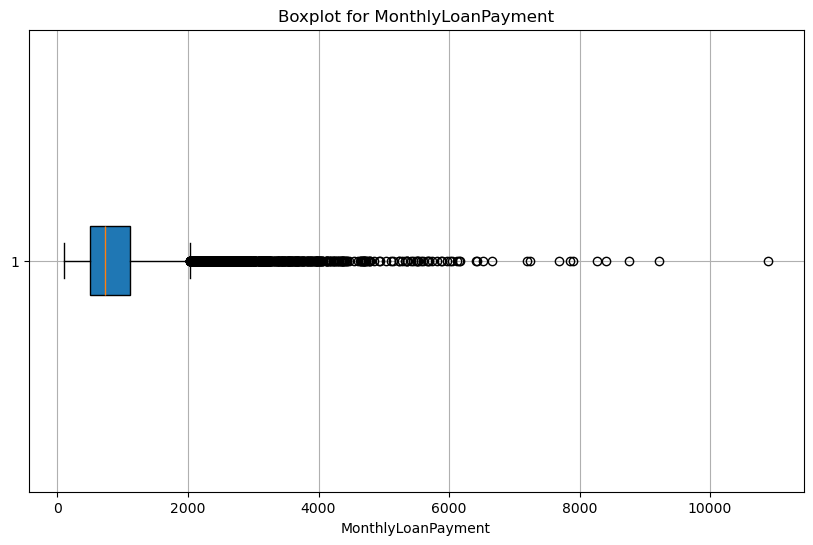

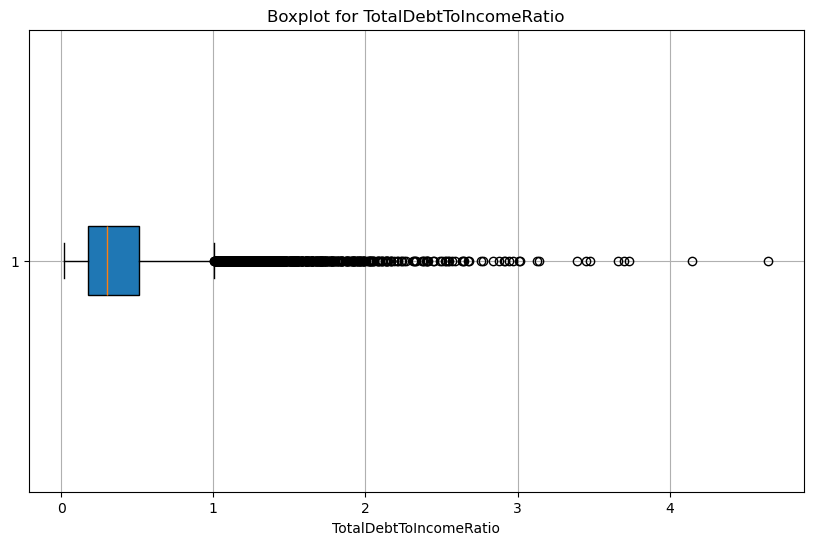

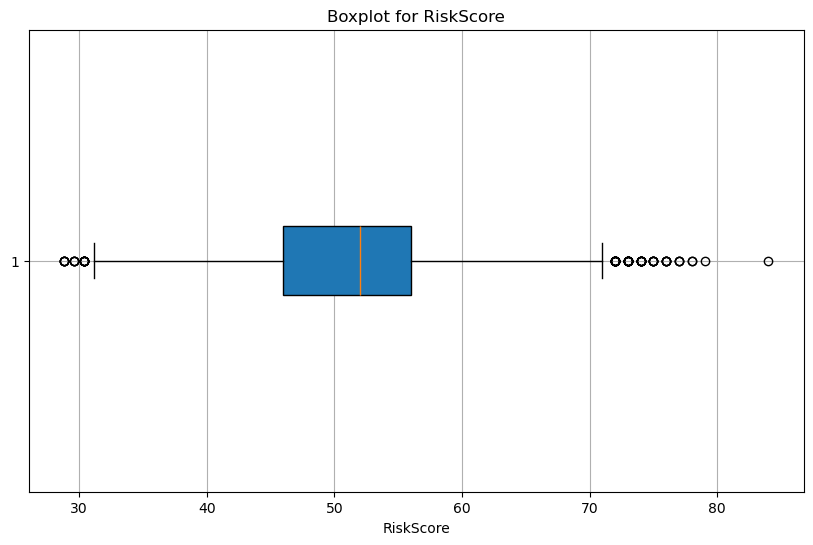

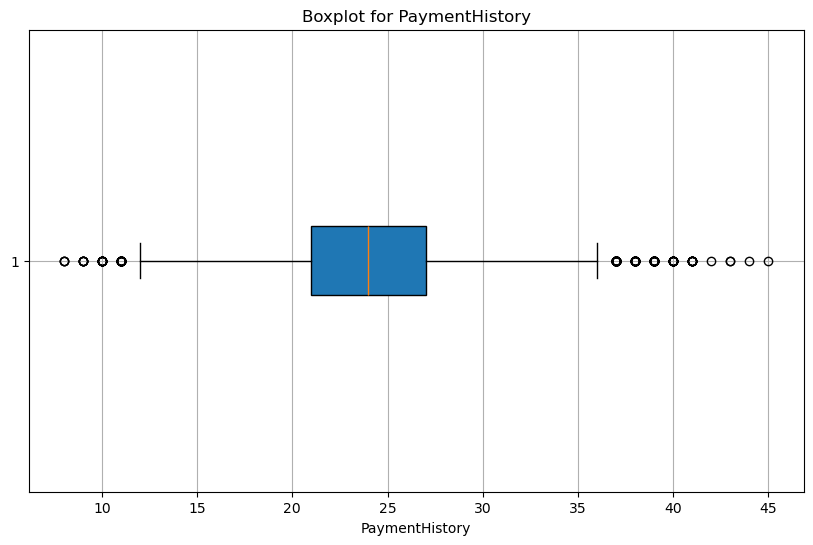

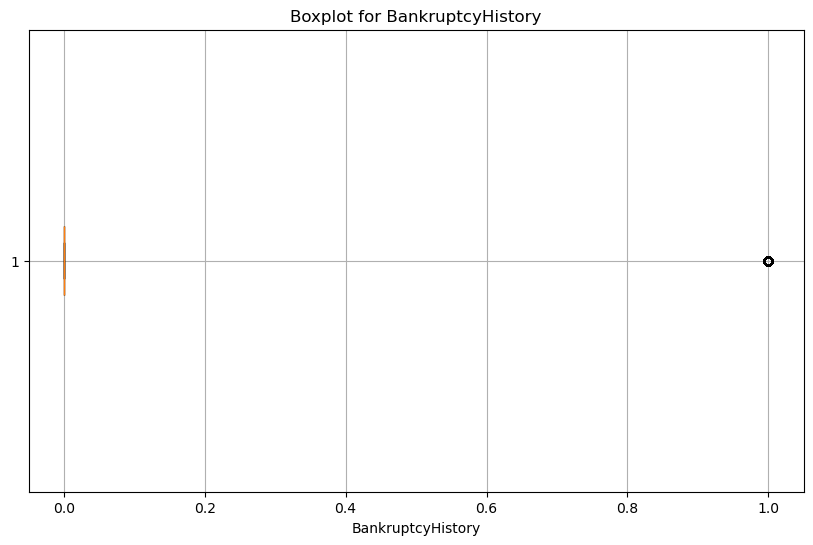

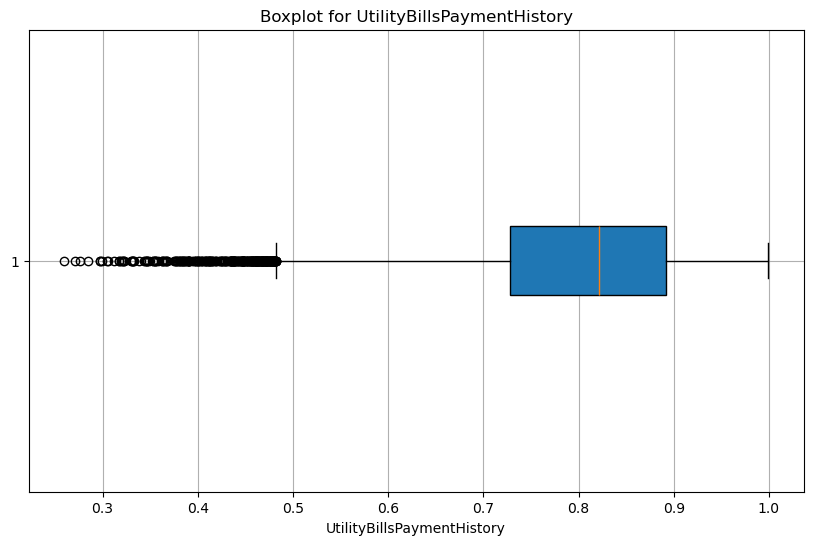

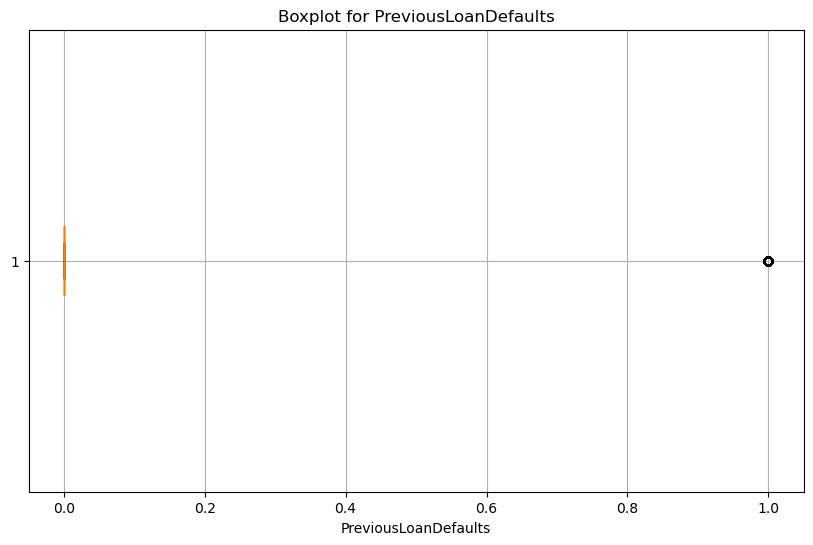

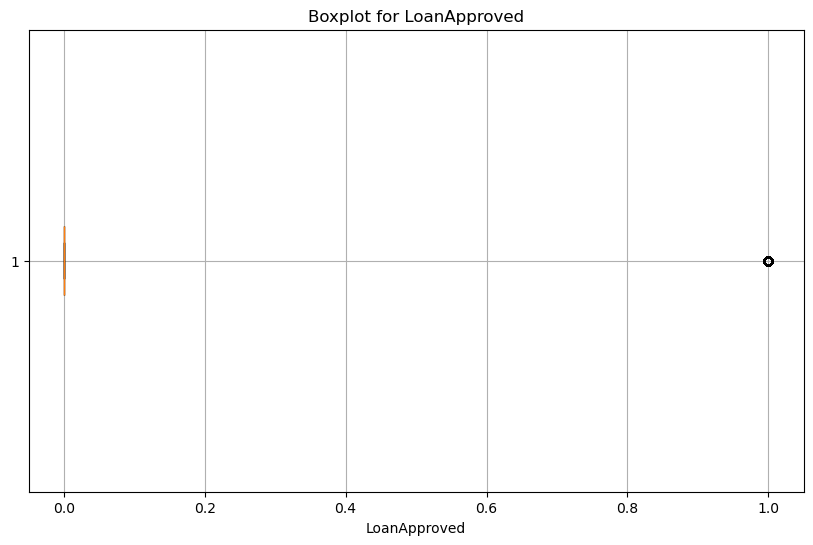

In [105]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    plt.boxplot(data[column].dropna(), vert=False, patch_artist=True)
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.grid(True)
    plt.show()

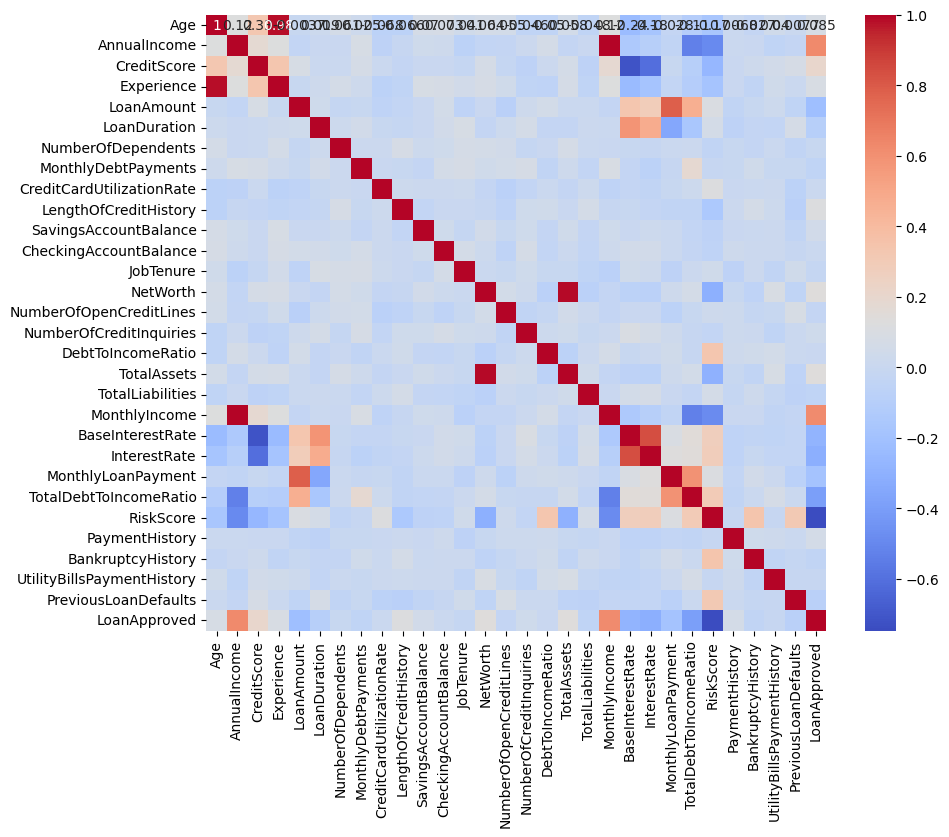

In [131]:
correlation_matrix = data[numerical_columns].dropna().corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.show()

C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\filip\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

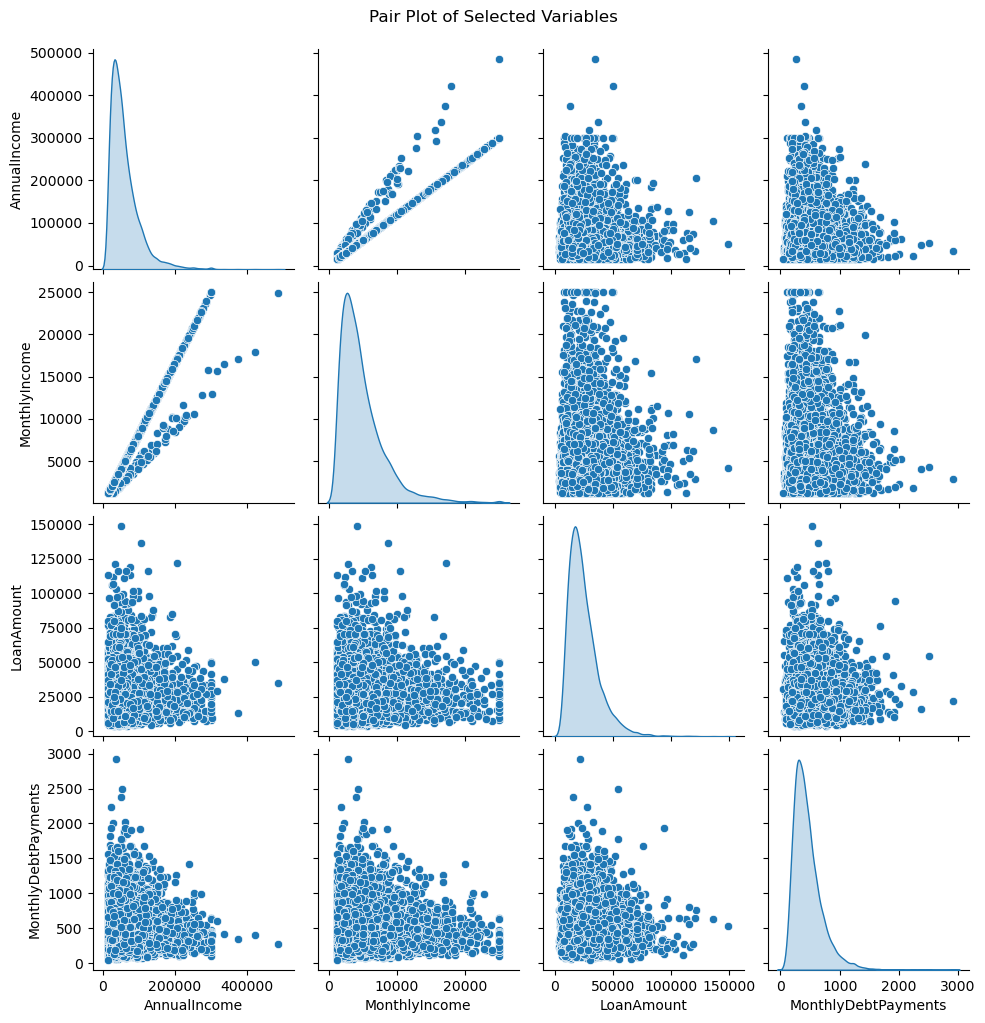

In [141]:
selected_columns = ['AnnualIncome', 'MonthlyIncome', 'LoanAmount', 'MonthlyDebtPayments'] 
# selected_columns = ['CreditScore', 'RiskScore', 'DebtToIncomeRatio', 'PaymentHistory'] 
sns.pairplot(data[selected_columns].dropna(), diag_kind='kde')  
plt.suptitle("Pair Plot of Selected Variables", y=1.02) 
plt.show()

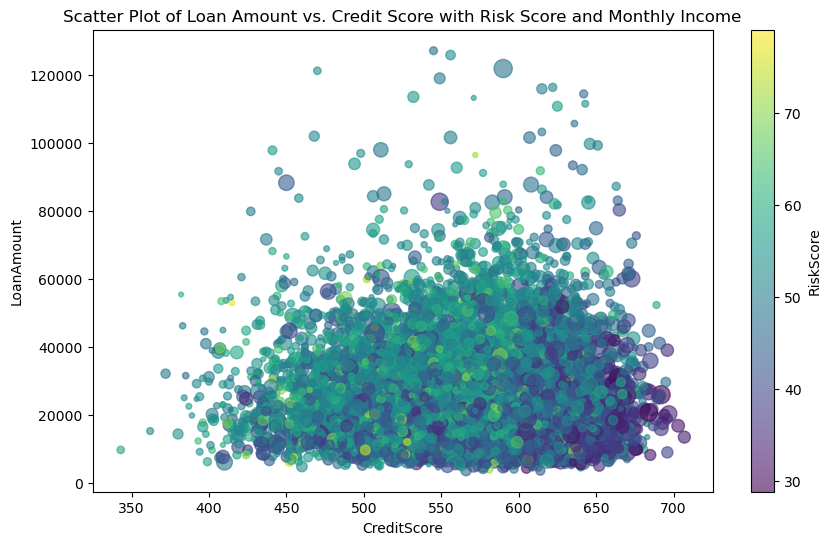

In [58]:
selected_columns = ['CreditScore', 'LoanAmount', 'RiskScore', 'MonthlyIncome']
clean_data = data.dropna(subset=selected_columns)
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    clean_data['CreditScore'],
    clean_data['LoanAmount'],
    c=clean_data['RiskScore'],         
    s=clean_data['MonthlyIncome'] / 100,
    alpha=0.6,
    cmap='viridis'
)
plt.colorbar(scatter, label='RiskScore')
plt.xlabel('CreditScore')
plt.ylabel('LoanAmount')
plt.title('Scatter Plot of Loan Amount vs. Credit Score with Risk Score and Monthly Income')
plt.show()

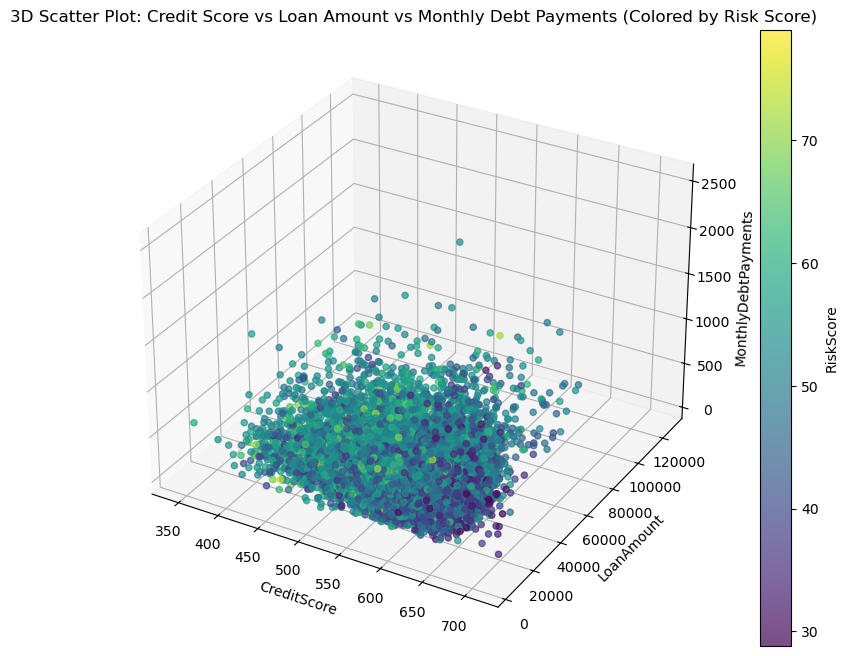

In [59]:
selected_columns = ['CreditScore', 'LoanAmount', 'MonthlyDebtPayments', 'RiskScore']
clean_data = data[selected_columns].dropna()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = clean_data['CreditScore']
y = clean_data['LoanAmount']
z = clean_data['MonthlyDebtPayments']
color = clean_data['RiskScore']

scatter = ax.scatter(x, y, z, c=color, cmap='viridis', alpha=0.7)

ax.set_xlabel('CreditScore')
ax.set_ylabel('LoanAmount')
ax.set_zlabel('MonthlyDebtPayments')
plt.colorbar(scatter, label='RiskScore')
plt.title('3D Scatter Plot: Credit Score vs Loan Amount vs Monthly Debt Payments (Colored by Risk Score)')

plt.show()

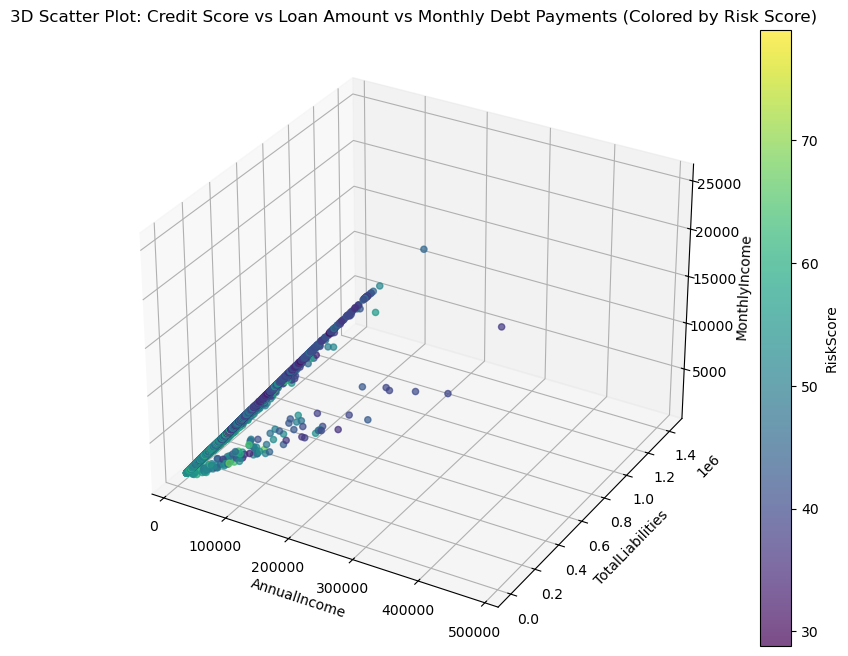

In [60]:
selected_columns = ['AnnualIncome', 'TotalLiabilities', 'MonthlyIncome', 'RiskScore']
clean_data = data[selected_columns].dropna()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = clean_data['AnnualIncome']
y = clean_data['TotalLiabilities']
z = clean_data['MonthlyIncome']
color = clean_data['RiskScore']

scatter = ax.scatter(x, y, z, c=color, cmap='viridis', alpha=0.7)

ax.set_xlabel('AnnualIncome')
ax.set_ylabel('TotalLiabilities')
ax.set_zlabel('MonthlyIncome')
plt.colorbar(scatter, label='RiskScore')
plt.title('3D Scatter Plot: Credit Score vs Loan Amount vs Monthly Debt Payments (Colored by Risk Score)')

plt.show()

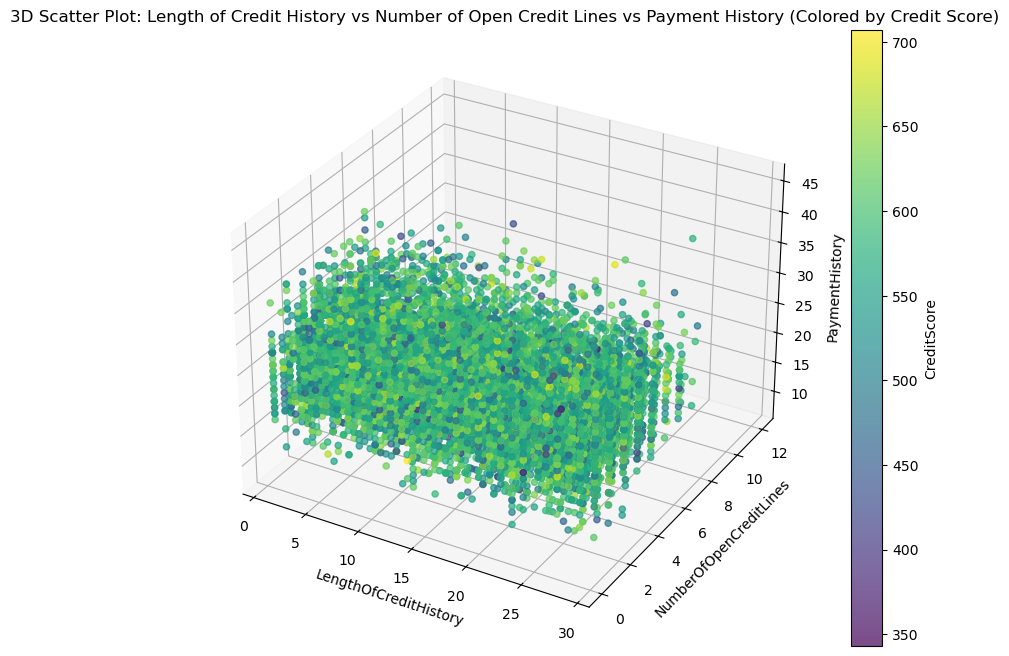

In [54]:
selected_columns = ['LengthOfCreditHistory', 'NumberOfOpenCreditLines', 'PaymentHistory', 'CreditScore']
clean_data = data[selected_columns].dropna()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = clean_data['LengthOfCreditHistory']
y = clean_data['NumberOfOpenCreditLines']
z = clean_data['PaymentHistory']
color = clean_data['CreditScore']

scatter = ax.scatter(x, y, z, c=color, cmap='viridis', alpha=0.7)

ax.set_xlabel('LengthOfCreditHistory')
ax.set_ylabel('NumberOfOpenCreditLines')
ax.set_zlabel('PaymentHistory')
plt.colorbar(scatter, label='CreditScore')
plt.title('3D Scatter Plot: Length of Credit History vs Number of Open Credit Lines vs Payment History (Colored by Credit Score)')

plt.show()

# Średnia wartość pożyczki w zależności od statusu zatrudnienia

EmploymentStatus
Unemployed       25484.028244
Employed         24775.911861
Self-Employed    24660.179299
Name: LoanAmount, dtype: float64


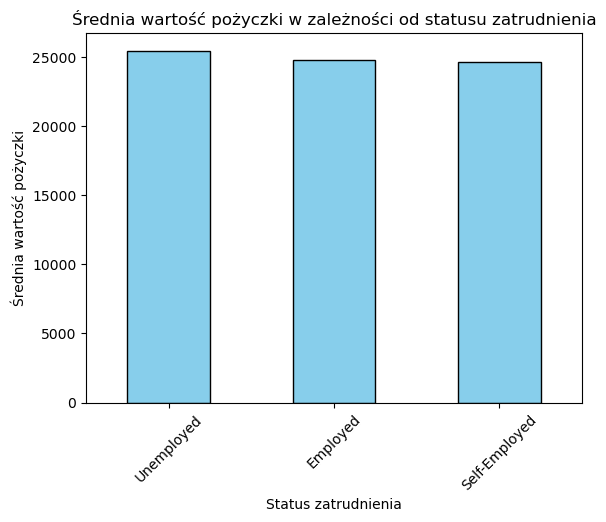

In [42]:
selected_columns = ['LoanAmount', 'EmploymentStatus']
clean_data = data[selected_columns].dropna()

average_loan_amount = clean_data.groupby('EmploymentStatus')['LoanAmount'].mean().sort_values(ascending=False)
print(average_loan_amount)

average_loan_amount.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Średnia wartość pożyczki w zależności od statusu zatrudnienia')
plt.xlabel('Status zatrudnienia')
plt.ylabel('Średnia wartość pożyczki')
plt.xticks(rotation=45)
plt.show()

# Średni wynik kredytowy w zależności od wieku

Age
18.0    544.742947
19.0    540.733945
20.0    544.963964
21.0    544.011299
22.0    546.292818
           ...    
76.0    658.333333
77.0    642.333333
78.0    627.500000
79.0    674.000000
80.0    646.857143
Name: CreditScore, Length: 63, dtype: float64


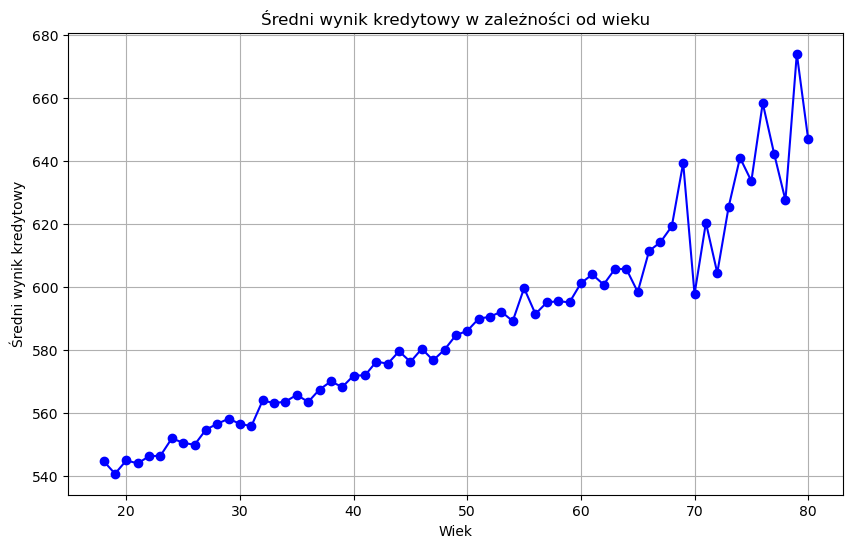

In [43]:
selected_columns = ['Age', 'CreditScore']
clean_data = data[selected_columns].dropna()

average_credit_score = clean_data.groupby('Age')['CreditScore'].mean().sort_index()
print(average_credit_score)

plt.figure(figsize=(10, 6))
plt.plot(average_credit_score.index, average_credit_score.values, marker='o', color='b', linestyle='-')
plt.title('Średni wynik kredytowy w zależności od wieku')
plt.xlabel('Wiek')
plt.ylabel('Średni wynik kredytowy')
plt.grid()
plt.show()

# Częstotliwość występowania pożyczek niezatwierdzonych w zależności od historii bankructw

BankruptcyHistory
0.0    11321
1.0      726
Name: count, dtype: int64


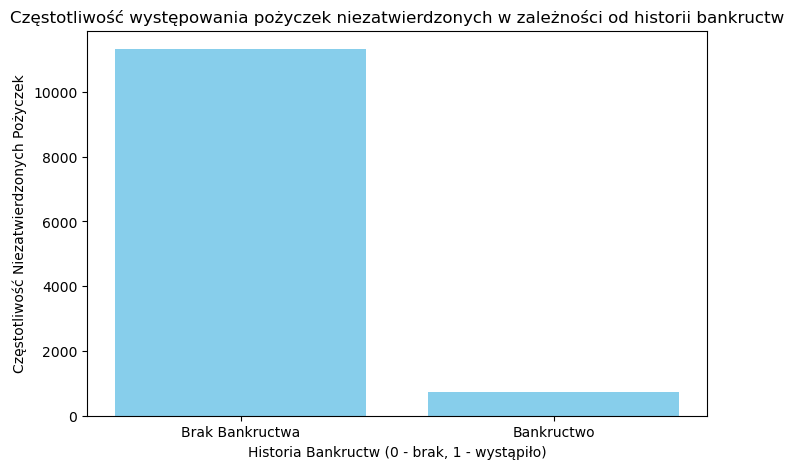

In [53]:
selected_columns = ['LoanApproved', 'BankruptcyHistory']
clean_data = data[selected_columns].dropna()
filtered_data = clean_data[clean_data['LoanApproved'] == 0]
bankruptcy_counts = filtered_data['BankruptcyHistory'].value_counts().sort_index()
print(bankruptcy_counts)
plt.figure(figsize=(8, 5))
plt.bar(bankruptcy_counts.index, bankruptcy_counts.values, color='skyblue')
plt.xlabel('Historia Bankructw (0 - brak, 1 - wystąpiło)')
plt.ylabel('Częstotliwość Niezatwierdzonych Pożyczek')
plt.title('Częstotliwość występowania pożyczek niezatwierdzonych w zależności od historii bankructw')
plt.xticks([0, 1], ['Brak Bankructwa', 'Bankructwo'])
plt.show()

# Porównanie miesięcznego dochodu pomiędzy osobami z różnym wynikiem ryzyka

RiskCategory
Niskie Ryzyko     8420.368417
Średnie Ryzyko    4422.561493
Wysokie Ryzyko    3634.831680
Name: MonthlyIncome, dtype: float64


C:\Users\filip\AppData\Local\Temp\ipykernel_35792\1148021755.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_income = clean_data.groupby('RiskCategory')['MonthlyIncome'].mean()


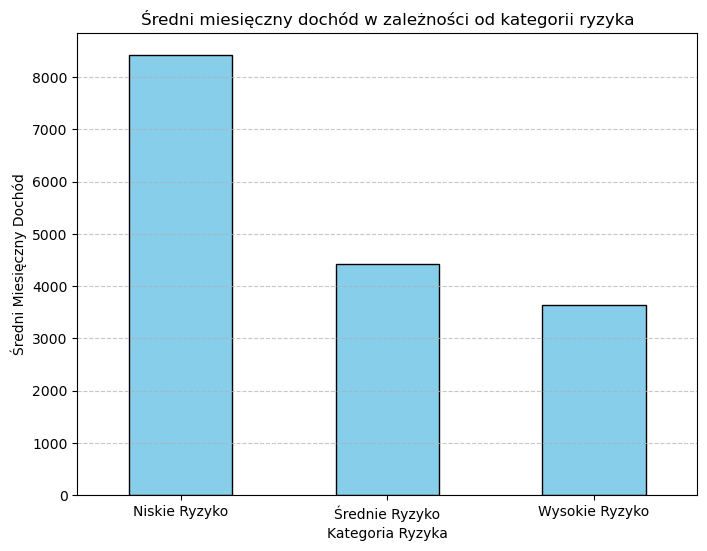

In [47]:
selected_columns = ['MonthlyIncome', 'RiskScore']
clean_data = data[selected_columns].dropna()
bins = [0, 40, 60, 100]
labels = ['Niskie Ryzyko', 'Średnie Ryzyko', 'Wysokie Ryzyko']
clean_data['RiskCategory'] = pd.cut(clean_data['RiskScore'], bins=bins, labels=labels)
mean_income = clean_data.groupby('RiskCategory')['MonthlyIncome'].mean()
print(mean_income)
plt.figure(figsize=(8, 6))
mean_income.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Średni miesięczny dochód w zależności od kategorii ryzyka')
plt.xlabel('Kategoria Ryzyka')
plt.ylabel('Średni Miesięczny Dochód')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Średnie zadłużenie w zależności od liczby posiadanych linii kredytowych

NumberOfOpenCreditLines
0.0     36493.828017
1.0     37285.737826
2.0     35718.287629
3.0     37479.382458
4.0     36577.768556
5.0     33864.321958
6.0     35656.279481
7.0     33255.352113
8.0     42167.984127
9.0     35018.612245
10.0    48649.230769
11.0    58853.666667
12.0    16484.000000
13.0    98345.000000
Name: TotalLiabilities, dtype: float64


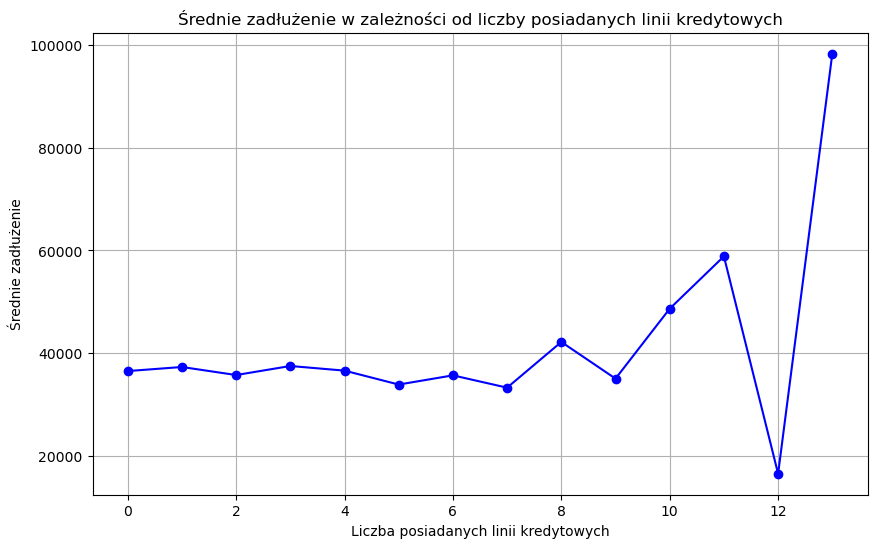

In [49]:
selected_columns = ['TotalLiabilities', 'NumberOfOpenCreditLines']
clean_data = data[selected_columns].dropna()
average_liabilities = clean_data.groupby('NumberOfOpenCreditLines')['TotalLiabilities'].mean()
print(average_liabilities)
plt.figure(figsize=(10, 6))
plt.plot(average_liabilities.index, average_liabilities.values, marker='o', color='b', linestyle='-')
plt.xlabel('Liczba posiadanych linii kredytowych')
plt.ylabel('Średnie zadłużenie')
plt.title('Średnie zadłużenie w zależności od liczby posiadanych linii kredytowych')
plt.grid()
plt.show()

# Średnia wartość aktywów w zależności od poziomu wykształcenia

EducationLevel
Associate      94992.503925
Bachelor       96834.713549
Doctorate      99491.934927
High School    96724.776435
Master         97045.616917
Name: TotalAssets, dtype: float64


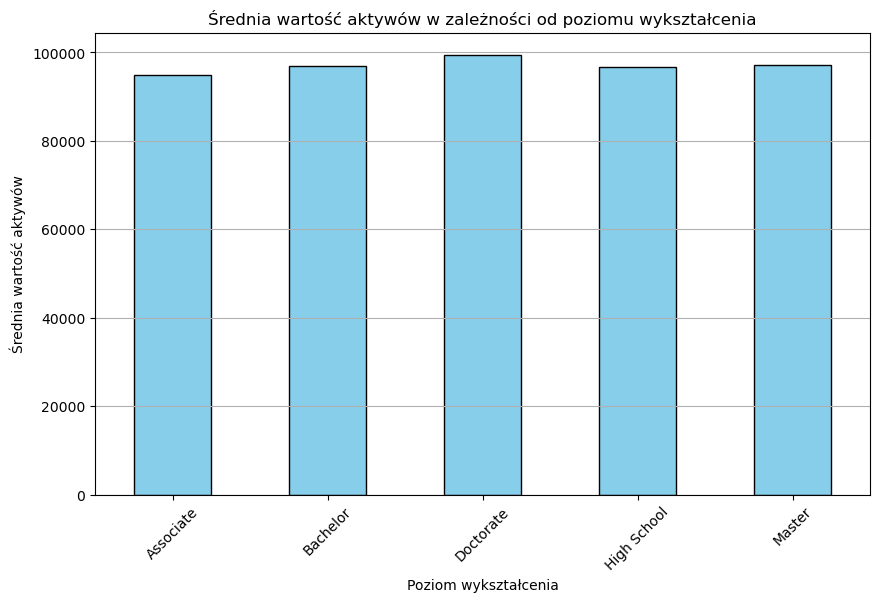

In [52]:
selected_columns = ['EducationLevel', 'TotalAssets']
clean_data = data[selected_columns].dropna()
mean_assets_by_education = clean_data.groupby('EducationLevel')['TotalAssets'].mean()
print(mean_assets_by_education)
plt.figure(figsize=(10, 6))
mean_assets_by_education.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Średnia wartość aktywów w zależności od poziomu wykształcenia')
plt.xlabel('Poziom wykształcenia')
plt.ylabel('Średnia wartość aktywów')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()